## Importing libraries and data files

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt

import scipy.optimize as opt
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

import re
import html
import unicodedata
import string

## For Preparing Features to Model
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving US_Elections_2020.csv to US_Elections_2020.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stop_words.txt to stop_words.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis.csv


In [ ]:
data1= pd.read_csv('sentiment_analysis.csv')
data2= pd.read_csv('US_Elections_2020.csv')
data1.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


In [ ]:
#stop words list to be used during cleaning the tweets
# given_stop_words= open('stop_words.txt','r',encoding="utf8").read()
# print(len(given_stop_words))
stop_words = open('stop_words.txt','r').read()
with open('stop_words.txt', 'r') as f:
    given_stop_words = f.read().splitlines()

In [ ]:
tweetsplit= stop_words.split('\n')
tweetsplit

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [ ]:
#creating a copy of datasets and keeping the original unchanged
sentiment_ananlysis_copy = data1.copy()
US_elections_2020_copy= data2.copy()
US_elections_2020_copy.head()

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN


## Part 1:Data cleaning

### Removing the column name 'ID' as it is not used in data modelling part

In [ ]:
sentiment_ananlysis_copy=sentiment_ananlysis_copy.drop(['ID'],axis=1)
sentiment_ananlysis_copy.head()

,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1


### Cleaning the tweets includes:
All html tags and attributes (i.e., /<[^>]+>/) are removed.

o Html character codes (i.e., &...;) are replaced with an ASCII equivalent.

o All URLs are removed.

o All characters in the text are in lowercase.

o All stop words are removed. Be clear in what you consider as a stop word.

o If a tweet is empty after pre-processing, it should be preserved as such.

###  1. Removing all URLS

In [ ]:
def remove_url(tweet):
    tweet = re.sub('http\S+', '', tweet) 
    tweet = re.sub('www.\S+', '', tweet)
                                         # to remove links that start with HTTP/HTTPS in the tweet
    return tweet               



In [ ]:
sentiment_ananlysis_copy['without_url'] = sentiment_ananlysis_copy['text'].apply(lambda x: remove_url(x))
sentiment_ananlysis_copy.head()

,text,label,without_url
0,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...
2,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki..."
3,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ..."
4,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...


In [ ]:
sentiment_ananlysis_copy['text']

0         Josh Jenkins is looking forward to TAB Breeder...
1         RT @MianUsmanJaved: Congratulations Pakistan o...
2         RT @PEPalerts: This September, @YESmag is taki...
3         RT @david_gaibis: Newly painted walls, thanks ...
4         RT @CedricFeschotte: Excited to announce: as o...
                                ...                        
550386    @goddesses_o I can't stop watching her...mm. M...
550387    Poor old Tom Odell doesn't look like he would ...
550388    #antsmasher I smashed  7 ants in this awesome ...
550389    @LizHudston @KymWyllie @Evasmiless @meanBok @l...
550390    Bixbeat Mixtape Vol.2 is here with great artis...
Name: text, Length: 550391, dtype: object

In [ ]:
sentiment_ananlysis_copy['without_url']

0         Josh Jenkins is looking forward to TAB Breeder...
1         RT @MianUsmanJaved: Congratulations Pakistan o...
2         RT @PEPalerts: This September, @YESmag is taki...
3         RT @david_gaibis: Newly painted walls, thanks ...
4         RT @CedricFeschotte: Excited to announce: as o...
                                ...                        
550386    @goddesses_o I can't stop watching her...mm. M...
550387    Poor old Tom Odell doesn't look like he would ...
550388    #antsmasher I smashed  7 ants in this awesome ...
550389    @LizHudston @KymWyllie @Evasmiless @meanBok @l...
550390    Bixbeat Mixtape Vol.2 is here with great artis...
Name: without_url, Length: 550391, dtype: object

### 2. Remove twitter handles

In [ ]:
def remove_twitter_handle(tweet):
    
    tweet = re.sub(r'@\S+', '', tweet)
    
    return tweet

In [ ]:
sentiment_ananlysis_copy['remove_twitter_handles']= sentiment_ananlysis_copy['without_url'].apply(lambda x: remove_twitter_handle(x))
sentiment_ananlysis_copy['remove_twitter_handles']

0         Josh Jenkins is looking forward to TAB Breeder...
1         RT  Congratulations Pakistan on becoming #No1T...
2         RT  This September,  is taking you to Maine Me...
3         RT  Newly painted walls, thanks a million to o...
4         RT  Excited to announce: as of July 2017 Fesch...
                                ...                        
550386             I can't stop watching her...mm. More??? 
550387    Poor old Tom Odell doesn't look like he would ...
550388    #antsmasher I smashed  7 ants in this awesome ...
550389              morning girls have a wonderful #Friday 
550390    Bixbeat Mixtape Vol.2 is here with great artis...
Name: remove_twitter_handles, Length: 550391, dtype: object

In [ ]:
#def Clean_Gen(tweet):
    
   # '''Function to clean General Tweets dataset'''
    
#tweet_comb = []
    
#word = tweet.lower()  # converting text into lowercase

   

#comp = re.compile(r'<\n>?]')
#word = re.sub(comp, '', word)  # removing HTML attributes

#word = html.unescape(word)  # converting HTML character codes into their ASCII Equivalent

#tweet_comb.append(word)
    
#return str(tweet_comb)

In [ ]:
#sentiment_ananlysis_copy['text_clean']

### 3. Lowercase text

In [ ]:
def lowercase(tweet):
    tweet= tweet.lower()
    return tweet

In [ ]:
sentiment_ananlysis_copy['lowercase']= sentiment_ananlysis_copy['remove_twitter_handles'].apply(lambda x: lowercase(x))
sentiment_ananlysis_copy['lowercase'].head()

0    josh jenkins is looking forward to tab breeder...
1    rt  congratulations pakistan on becoming #no1t...
2    rt  this september,  is taking you to maine me...
3    rt  newly painted walls, thanks a million to o...
4    rt  excited to announce: as of july 2017 fesch...
Name: lowercase, dtype: object

### 4. Remove all HTML tags and attributes

In [ ]:
def html_attributes(tweet):
    comp = re.compile(r', /<[^>]+>/')
    tweet = re.sub(comp, '', tweet)
    
    return tweet

In [ ]:
sentiment_ananlysis_copy['remove_html_attributes']=sentiment_ananlysis_copy['lowercase'].apply(lambda x: html_attributes(x))
sentiment_ananlysis_copy['remove_html_attributes'].head()

0    josh jenkins is looking forward to tab breeder...
1    rt  congratulations pakistan on becoming #no1t...
2    rt  this september,  is taking you to maine me...
3    rt  newly painted walls, thanks a million to o...
4    rt  excited to announce: as of july 2017 fesch...
Name: remove_html_attributes, dtype: object

### 5. Convert to ASCII characters

In [ ]:
def html_to_ascii(tweet):
    tweet= html.unescape(tweet)
    return tweet

In [ ]:
sentiment_ananlysis_copy['html_to_ascii']=sentiment_ananlysis_copy['remove_html_attributes'].apply(lambda x: html_to_ascii(x))
sentiment_ananlysis_copy['html_to_ascii']

0         josh jenkins is looking forward to tab breeder...
1         rt  congratulations pakistan on becoming #no1t...
2         rt  this september,  is taking you to maine me...
3         rt  newly painted walls, thanks a million to o...
4         rt  excited to announce: as of july 2017 fesch...
                                ...                        
550386             i can't stop watching her...mm. more??? 
550387    poor old tom odell doesn't look like he would ...
550388    #antsmasher i smashed  7 ants in this awesome ...
550389              morning girls have a wonderful #friday 
550390    bixbeat mixtape vol.2 is here with great artis...
Name: html_to_ascii, Length: 550391, dtype: object

### 6.  Remove Punctuations

In [ ]:
def remove_punctuations(tweet):
    tweet= re.sub(r'[^\w\s]', '', tweet)
    return tweet

In [ ]:
sentiment_ananlysis_copy['no_punctuations']=sentiment_ananlysis_copy['remove_html_attributes'].apply(lambda x: remove_punctuations(x))
sentiment_ananlysis_copy['no_punctuations'].head()

0    josh jenkins is looking forward to tab breeder...
1    rt  congratulations pakistan on becoming no1te...
2    rt  this september  is taking you to maine men...
3    rt  newly painted walls thanks a million to ou...
4    rt  excited to announce as of july 2017 fescho...
Name: no_punctuations, dtype: object

### 7. Delete NON ASCII 

In [ ]:
def delete_non_ascii(tweet):
    
    
    
    tweet = ''.join(c for c in tweet if ord(c) < 128)
    
    return tweet

In [ ]:
sentiment_ananlysis_copy['non_ascii']=sentiment_ananlysis_copy['no_punctuations'].apply(lambda x: delete_non_ascii(x))
sentiment_ananlysis_copy['non_ascii'].loc[201]
    
  

'rt   thank you  have a nice day  '

### 8. Remove Stop Words

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Removing stop words and Tokenizing

In [ ]:
def remove_stop_words_and_tokenize(tweet):

    """
    APPLICATION OF THE FUNCTION:
        Input a tweet to remove stop words like a, an, the etc
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet
    """    
    s1 = ' '
    tokenizer = RegexpTokenizer(r'\w+')         
    tokenised_tweet = tokenizer.tokenize(tweet)
    stopword = nltk.corpus.stopwords.words('english')
    stopword.extend(['rt'])
    stopword.extend(given_stop_words)
    stopword = list(set(stopword))    
        
    words_rmStop = [word for word in tokenised_tweet if word not in stopword] # remove stop words
#     tweet_no_stop_words = s1.join(words_rmStop)
    
    return words_rmStop

### Stemming

In [ ]:
tokenizer = RegexpTokenizer(r'\w+') 
sentiment_ananlysis_copy['tokenized_tweet']= sentiment_ananlysis_copy['non_ascii'].apply(lambda x: remove_stop_words_and_tokenize(x) )
sentiment_ananlysis_copy['tokenized_tweet']

0         [josh, jenkins, forward, tab, breeders, crown,...
1         [congratulations, pakistan, no1testteam, odds,...
2         [september, maine, mendozas, surprise, thanksg...
3         [newly, painted, walls, custodial, painters, s...
4         [excited, july, 2017, feschotte, lab, relocati...
                                ...                        
550386                              [cant, watching, hermm]
550387             [poor, tom, odell, doesnt, wrong, crowd]
550388    [antsmasher, smashed, 7, ants, awesome, gamehj...
550389                  [morning, girls, wonderful, friday]
550390    [bixbeat, mixtape, vol2, great, artiste, join,...
Name: tokenized_tweet, Length: 550391, dtype: object

In [ ]:
ps = nltk.PorterStemmer()

def stemming(tokenised_tweet):
    
    
    
    stemmed_tweet = [ps.stem(word) for word in tokenised_tweet]
    return stemmed_tweet

In [ ]:
sentiment_ananlysis_copy['stemming']=sentiment_ananlysis_copy['tokenized_tweet'].apply(lambda x: stemming(x))
sentiment_ananlysis_copy['stemming'].head()

0    [josh, jenkin, forward, tab, breeder, crown, s...
1    [congratul, pakistan, no1testteam, odd, ji_pak...
2    [septemb, main, mendoza, surpris, thanksgiv, p...
3    [newli, paint, wall, custodi, painter, summer,...
4       [excit, juli, 2017, feschott, lab, reloc, mbg]
Name: stemming, dtype: object

In [ ]:
sentiment_ananlysis_copy['stemming'][0]

['josh', 'jenkin', 'forward', 'tab', 'breeder', 'crown', 'super', 'sunday']

In [ ]:
sentiment_ananlysis_copy.head()

,text,label,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming
0,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,"[josh, jenkins, forward, tab, breeders, crown,...","[josh, jenkin, forward, tab, breeder, crown, s..."
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT Congratulations Pakistan on becoming #No1T...,rt congratulations pakistan on becoming #no1t...,rt congratulations pakistan on becoming #no1t...,rt congratulations pakistan on becoming #no1t...,rt congratulations pakistan on becoming no1te...,rt congratulations pakistan on becoming no1te...,"[congratulations, pakistan, no1testteam, odds,...","[congratul, pakistan, no1testteam, odd, ji_pak..."
2,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...","RT This September, is taking you to Maine Me...","rt this september, is taking you to maine me...","rt this september, is taking you to maine me...","rt this september, is taking you to maine me...",rt this september is taking you to maine men...,rt this september is taking you to maine men...,"[september, maine, mendozas, surprise, thanksg...","[septemb, main, mendoza, surpris, thanksgiv, p..."
3,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...","RT Newly painted walls, thanks a million to o...","rt newly painted walls, thanks a million to o...","rt newly painted walls, thanks a million to o...","rt newly painted walls, thanks a million to o...",rt newly painted walls thanks a million to ou...,rt newly painted walls thanks a million to ou...,"[newly, painted, walls, custodial, painters, s...","[newli, paint, wall, custodi, painter, summer,..."
4,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT Excited to announce: as of July 2017 Fesch...,rt excited to announce: as of july 2017 fesch...,rt excited to announce: as of july 2017 fesch...,rt excited to announce: as of july 2017 fesch...,rt excited to announce as of july 2017 fescho...,rt excited to announce as of july 2017 fescho...,"[excited, july, 2017, feschotte, lab, relocati...","[excit, juli, 2017, feschott, lab, reloc, mbg]"


### Detokenize tweet

In [ ]:
def detokenize(tokenised_tweet):
    """
    APPLICATION OF THE FUNCTION:
        Input a tokenized tweet to detokenize
    
    PARAMETERS:
        - tweet = tweet to clean
    
    RETURN:
        - cleaned tweet detokenized
    """    
    s1 = ' '
    tweet_detokenised = s1.join(tokenised_tweet)
    
    return tweet_detokenised

In [ ]:
sentiment_ananlysis_copy['detokenize']=sentiment_ananlysis_copy['stemming'].apply(lambda x : detokenize(x))
sentiment_ananlysis_copy['detokenize']

0         josh jenkin forward tab breeder crown super su...
1         congratul pakistan no1testteam odd ji_pakzinda...
2         septemb main mendoza surpris thanksgiv parti t...
3         newli paint wall custodi painter summer great ...
4                    excit juli 2017 feschott lab reloc mbg
                                ...                        
550386                                     cant watch hermm
550387                     poor tom odel doesnt wrong crowd
550388               antsmash smash 7 ant awesom gamehjfjfi
550389                              morn girl wonder friday
550390    bixbeat mixtap vol2 great artist join movement...
Name: detokenize, Length: 550391, dtype: object

Cleaning the US_Elections_2020 Dataset

In [ ]:
def US_clean(tweet):
    
    ## As Elections tweets are in bytes format, decoding the same in utf-8 format 
    if (tweet[0:2] == 'b"') | (tweet[0:2] == "b'"):

        if (tweet[-1] != "'") & (tweet[1] == "'"):
            tweet = tweet + "'"
        elif (tweet[-1] != '"') & (tweet[1] == '"'):
            tweet = tweet + '"'
        tweet = eval(tweet).decode("utf-8", "ignore")
 
    return str(tweet)

In [ ]:
US_elections_2020_copy['decode'] = US_elections_2020_copy['text'].apply(lambda x: US_clean(x)) #remove URLs
US_elections_2020_copy['without_url'] = US_elections_2020_copy['decode'].apply(lambda x: remove_url(x)) #remove URLs
US_elections_2020_copy['remove_twitter_handles']= US_elections_2020_copy['without_url'].apply(lambda x: remove_twitter_handle(x)) #Removes twitter handles
US_elections_2020_copy['lowercase']= US_elections_2020_copy['remove_twitter_handles'].apply(lambda x : lowercase(x)) #lowercase
US_elections_2020_copy['remove_html_attributes']= US_elections_2020_copy['lowercase'].apply(lambda x: html_attributes(x)) #remove html attributes
US_elections_2020_copy['html_to_ascii']=US_elections_2020_copy['remove_html_attributes'].apply(lambda x: html_to_ascii(x)) #convert html to ascii
US_elections_2020_copy['no_punctuations']= US_elections_2020_copy['html_to_ascii'].apply(lambda x: remove_punctuations(x)) # remove punctuations
US_elections_2020_copy['non_ascii']=US_elections_2020_copy['no_punctuations'].apply(lambda x: delete_non_ascii(x)) #deleting non-ascii characters
US_elections_2020_copy['tokenized_tweet']=US_elections_2020_copy['non_ascii'].apply(lambda x: remove_stop_words_and_tokenize(x)) #Removing Stop words and tokenizing
US_elections_2020_copy['stemming']=US_elections_2020_copy['tokenized_tweet'].apply(lambda x: stemming(x)) #Stemming the tokenized tweet
US_elections_2020_copy['detokenize']=US_elections_2020_copy['stemming'].apply(lambda x: detokenize(x)) #detokenizing
US_elections_2020_copy['detokenize'].head()



0    afraid nov dec jan bidenharris2020 winfrump 3 ...
1    lord sumption launch recoveri initi promot ano...
2    uber time biden advisor pressur brazil sanctio...
3    107 second american die trumpviru donaldtrump ...
4    democrat embrac diversityandinclus citizen nat...
Name: detokenize, dtype: object

#Part 2 : Data exploaration



In [ ]:
US_elections_2020_copy['political_party'] = '0'

for i in range(len(US_elections_2020_copy['non_ascii'])):
    
    if ((pd.Series(US_elections_2020_copy['non_ascii'][i]).str.contains('joe|biden|democrat|dem|harris|kamala')[0]) & (pd.Series(US_elections_2020_copy['non_ascii'][i]).str.contains('donald|trump|republic|gop|ivanka|mike|pence|potus')[0])):
        # print('Mixed')
        US_elections_2020_copy['political_party'][i] = 'Mixed'
    
    elif (pd.Series(US_elections_2020_copy['non_ascii'][i]).str.contains('joe|biden|democrat|dem|harris|kamala')[0]):
        # print('Dems')
        US_elections_2020_copy['political_party'][i] = 'Democratic Party'
        
    elif (pd.Series(US_elections_2020_copy['non_ascii'][i]).str.contains('donald|trump|republic|gop|ivanka|mike|pence|potus')[0]):
        # print("Reps")
        US_elections_2020_copy['political_party'][i] = 'Republic Party'
                    
#     elif (pd.Series(US_elections_2020_copy['non_ascii'][i]).str.contains('thejagmeetsingh|ndp|jagmeet|singh|democratic')[0]):
#         US_elections_2020_copy['political_party'][i] = 'NDP'  
        
    else:
        # print('Other')
        US_elections_2020_copy['political_party'][i] = 'Others'

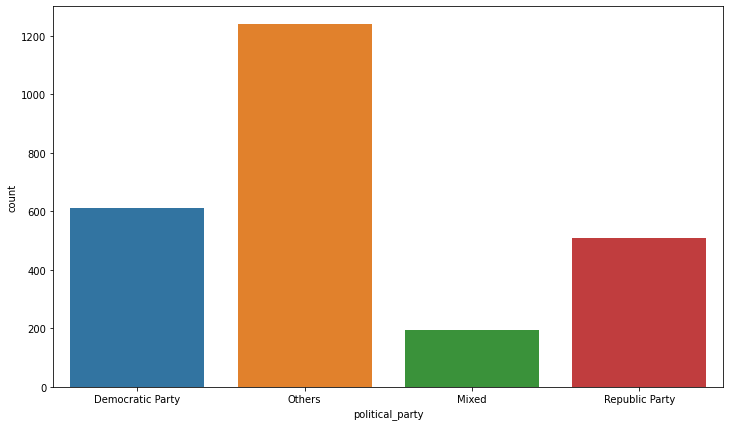

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=US_elections_2020_copy)

In [ ]:
US_elections_2020_copy.groupby('political_party')['political_party'].count()

political_party
Democratic Party     611
Mixed                193
Others              1239
Republic Party       509
Name: political_party, dtype: int64

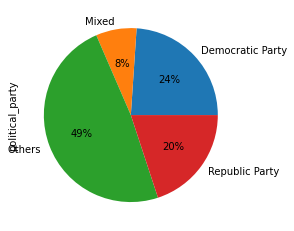

In [ ]:
US_elections_2020_copy.groupby('political_party')['political_party'].count().plot(kind='pie', autopct='%1.0f%%')

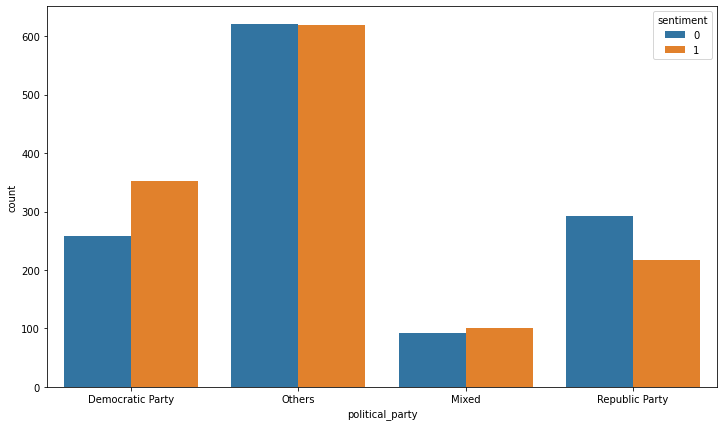

In [ ]:
## Further distributing based on negative and positive sentiments

plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=US_elections_2020_copy, hue='sentiment')



Greater proportion of positve sentiments is for democatic party.

almost Equal number of positive and negative tweets are assigned for unclassified tweets

Republic Party has more number of negative tweets





In [ ]:
US_elections_2020_copy.head()

,text,sentiment,negative_reason,decode,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize,political_party
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"@robreiner so afraid of Nov, Dec, and Jan! Eve...","@robreiner so afraid of Nov, Dec, and Jan! Eve...","so afraid of Nov, Dec, and Jan! Even if #Bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...",so afraid of nov dec and jan even if bidenhar...,so afraid of nov dec and jan even if bidenhar...,"[afraid, nov, dec, jan, bidenharris2020, winfr...","[afraid, nov, dec, jan, bidenharris2020, winfr...",afraid nov dec jan bidenharris2020 winfrump 3 ...,Democratic Party
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,RT @SueC00K: Lord Sumption launches Recovery -...,RT @SueC00K: Lord Sumption launches Recovery -...,RT Lord Sumption launches Recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery a new ini...,rt lord sumption launches recovery a new ini...,"[lord, sumption, launches, recovery, initiativ...","[lord, sumption, launch, recoveri, initi, prom...",lord sumption launch recoveri initi promot ano...,Others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,RT @WalidPhares: Uber Timing: after #Biden adv...,RT @WalidPhares: Uber Timing: after #Biden adv...,RT Uber Timing: after #Biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing after biden advisors said they...,rt uber timing after biden advisors said they...,"[uber, timing, biden, advisors, pressure, braz...","[uber, time, biden, advisor, pressur, brazil, ...",uber time biden advisor pressur brazil sanctio...,Democratic Party
3,b'Every 107 seconds an American is dying from ...,1,NaN,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,"[107, seconds, american, dying, trumpvirus, do...","[107, second, american, die, trumpviru, donald...",107 second american die trumpviru donaldtrump ...,Mixed
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,RT @thewebbix: The #Democrats embrace #Diversi...,RT @thewebbix: The #Democrats embrace #Diversi...,RT The #Democrats embrace #DiversityandInclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the democrats embrace diversityandinclusio...,rt the democrats embrace diversityandinclusio...,"[democrats, embrace, diversityandinclusion, ci...","[democrat, embrac, diversityandinclus, citizen...",democrat embrac diversityandinclus citizen nat...,Democratic Party


**plotting the WordCloud to determine which words appear more frequently**

In [ ]:
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

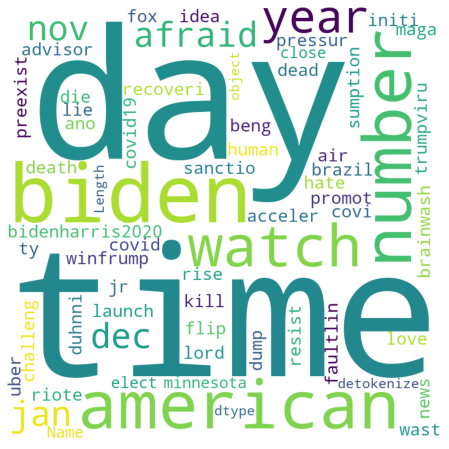

In [ ]:
## WordCloud for NEGATIVE tweets in US elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(US_elections_2020_copy[US_elections_2020_copy['sentiment']==0]['detokenize']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

Words such as "time", "day","biden"  and "afraid" appear frequently in NEGATIVE TWEETS.

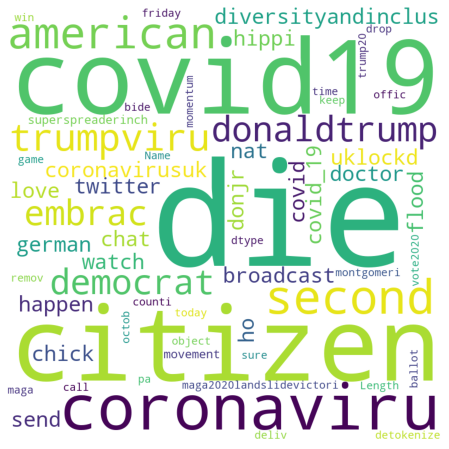

In [ ]:
## WordCloud for POSITIVE tweets in US elections Dataset

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(US_elections_2020_copy[US_elections_2020_copy['sentiment']==1]['detokenize']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

Words such as "citizen" , "donaldtrump", "covid19" seems to appear frequently in POSITIVE tweets.

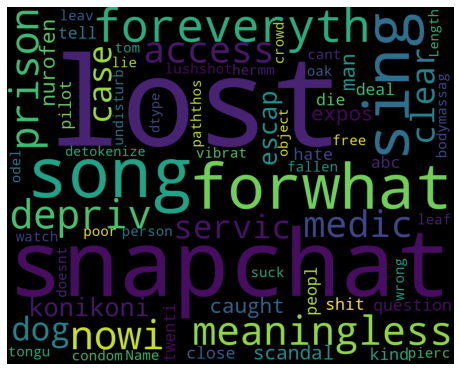

In [ ]:
## WordCloud for NEGATIVE tweets in Sentiments Dataset

wordcloud = WordCloud(width = 1000, height = 800, background_color ='black', min_font_size = 10).generate(str(sentiment_ananlysis_copy[sentiment_ananlysis_copy['label']==0]['detokenize']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

Words such as "Lost", "meaningless", etc. appear mostly in NEGATIVE tweets which is quite understood.

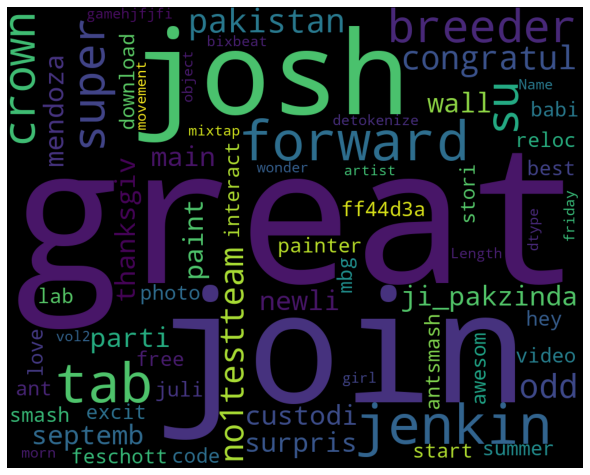

In [ ]:
## WordCloud for POSITIVE tweets in General Dataset

wordcloud = WordCloud(width = 1000, height = 800, background_color ='black', min_font_size = 10).generate(str(sentiment_ananlysis_copy[sentiment_ananlysis_copy['label']==1]['detokenize']))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Words such as "great", "join", "Jenkin" appear more frequently in POSITIVE TWEETS

In [ ]:
sentiment_ananlysis_copy.head()

,text,label,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize
0,Josh Jenkins is looking forward to TAB Breeder...,1,Josh Jenkins is looking forward to TAB Breeder...,Josh Jenkins is looking forward to TAB Breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,josh jenkins is looking forward to tab breeder...,"[josh, jenkins, forward, tab, breeders, crown,...","[josh, jenkin, forward, tab, breeder, crown, s...",josh jenkin forward tab breeder crown super su...
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1,RT @MianUsmanJaved: Congratulations Pakistan o...,RT Congratulations Pakistan on becoming #No1T...,rt congratulations pakistan on becoming #no1t...,rt congratulations pakistan on becoming #no1t...,rt congratulations pakistan on becoming #no1t...,rt congratulations pakistan on becoming no1te...,rt congratulations pakistan on becoming no1te...,"[congratulations, pakistan, no1testteam, odds,...","[congratul, pakistan, no1testteam, odd, ji_pak...",congratul pakistan no1testteam odd ji_pakzinda...
2,"RT @PEPalerts: This September, @YESmag is taki...",1,"RT @PEPalerts: This September, @YESmag is taki...","RT This September, is taking you to Maine Me...","rt this september, is taking you to maine me...","rt this september, is taking you to maine me...","rt this september, is taking you to maine me...",rt this september is taking you to maine men...,rt this september is taking you to maine men...,"[september, maine, mendozas, surprise, thanksg...","[septemb, main, mendoza, surpris, thanksgiv, p...",septemb main mendoza surpris thanksgiv parti t...
3,"RT @david_gaibis: Newly painted walls, thanks ...",1,"RT @david_gaibis: Newly painted walls, thanks ...","RT Newly painted walls, thanks a million to o...","rt newly painted walls, thanks a million to o...","rt newly painted walls, thanks a million to o...","rt newly painted walls, thanks a million to o...",rt newly painted walls thanks a million to ou...,rt newly painted walls thanks a million to ou...,"[newly, painted, walls, custodial, painters, s...","[newli, paint, wall, custodi, painter, summer,...",newli paint wall custodi painter summer great ...
4,RT @CedricFeschotte: Excited to announce: as o...,1,RT @CedricFeschotte: Excited to announce: as o...,RT Excited to announce: as of July 2017 Fesch...,rt excited to announce: as of july 2017 fesch...,rt excited to announce: as of july 2017 fesch...,rt excited to announce: as of july 2017 fesch...,rt excited to announce as of july 2017 fescho...,rt excited to announce as of july 2017 fescho...,"[excited, july, 2017, feschotte, lab, relocati...","[excit, juli, 2017, feschott, lab, reloc, mbg]",excit juli 2017 feschott lab reloc mbg


#Part-3 : Model Preparation

In [ ]:
## For building models    
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC

from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB

from sklearn import svm
## For evaluating models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

split data into 70% training and 30% testing data 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

In [ ]:
y_test

377616    1
489411    1
455776    1
71755     1
284963    1
         ..
277766    0
140243    1
411170    1
547642    0
203043    0
Name: label, Length: 165118, dtype: int64

#Bag Of Words:

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [ ]:
## Bag of Words on General Tweets

vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


#TF-IDF:

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

---> Applications of TF-IDF:

Information retrieval

Keyword Extraction

In [ ]:
## TF-IDF on General Tweets

vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)



##SVM MODEL

<h1> Support Vector Machine</h1>

A <b>support vector machine (SVM)</b> is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

Support vectors are the data points that lie closest to the decision surface (or hyperplane)

<img src="https://www.researchgate.net/profile/Ahsan_Javed_Awan/publication/336085357/figure/fig1/AS:807644327600128@1569568821061/An-example-of-SVM-classification-An-example-of-SVM-classification.png" />

This becomes a Quadratic programming problem that is easy to solve by standard methods
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQEtWqM9lxVoliMH7hHSytwib3u1nz-GehBDQ&usqp=CAU" />

Here, maximizing the distances between nearest data point (either class) and hyper-plane will help us to decide the right hyper-plane. This distance is called as <b> Margin.</b>
The SVM algorithm has a feature to ignore outliers and find the hyper-plane that has the maximum margin. Hence, we can say, SVM classification is <b>robust to outliers.</b>

SVM MODEL FOR BAG OF WORDS Features

In [ ]:
def svm_model_bagofwords():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
  array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


  classifier_liblinear = svm.LinearSVC(max_iter=2000)
  classifier_liblinear.fit(array_WF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format(score*100))

  return score



In [ ]:
svm_score_bagofwords = svm_model_bagofwords()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.18134909579815


SVM MODEL FOR TFIDF Features

In [ ]:
def svm_model_tfidf():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
  array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


  classifier_liblinear = svm.LinearSVC(max_iter=2000)
  classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score= accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format(score *100))

  return score



In [ ]:
svm_score_tfidf = svm_model_tfidf()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.18013784081687


Both the models have a higher accuracy of about <b> 92.18% </b> and as we know that SVM is great at performance when there is a wide partition in the categories compared to Linear Regression Model, we can compare the degree of distribution of people towards the election parties based on the performance of these models.

##DECISION TREE MODEL

<h1> Decision Tree Model </h1>

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree<b> as a predictive model</b> to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

From a high level, decision tree induction goes through 4 main steps to build the tree:
<ol>
<li>Begin with your training dataset, which should have some feature variables and classification or regression output.</li>
<li>Determine the “best feature” in the dataset to split the data on; more on how we define “best feature” later</li>
<li>Split the data into subsets that contain the possible values for this best feature. This splitting basically defines a node on the tree i.e each node is a splitting point based on a certain feature from our data.</li>
<li>Recursively generate new tree nodes by using the subset of data created from step 3. We keep splitting until we reach a point where we have optimised, by some measure, maximum accuracy while minimising the number of splits / nodes.</li>
</ol>

For step 2, the selection of which feature to use and the specific split is commonly chosen using a greedy algorithm to minimise a cost function. If we think about it for a second, performing a split when building a decision tree is equivalent to dividing up the feature space. We will iteratively try out different split points and then at the end select the one that has the lowest cost

<img src = "https://cdn-images-1.medium.com/max/800/1*QzU4G3U87oM-pMnRobOMFw.png"/>

This concept of having a single class per-split across our dataset is known as <i>information gain</i>. Check out the example below.

<img src = "https://cdn-images-1.medium.com/max/800/1*z7tK94rGGIy_42UpiqilLQ.png"/>

Decision Tree Classifier are <b> Easy to understand and interpret</b>. At each node, we are able to see exactly what decision our model is making. In practice we’ll be able to fully understand where our accuracies and errors are coming from, what type of data the model would do well with, and how the output is influenced by the values of the features. Scikit learn’s visualisation tool is a fantastic option for visualising and understanding decision trees.
For similar reasons as the case of <b>overfitting</b>, decision trees are also vulnerable to becoming biased to the classes that have a majority in the dataset. It’s always a good idea to do some kind of class balancing such as class weights, sampling, or a specialised loss function.

DECISION TREE MODEL FOR BAG OF WORDS Features

In [ ]:
def decision_tree_model_bagofwords():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
  array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_WF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format( score*100))

  return score

In [ ]:
dec_score_bagofwords=decision_tree_model_bagofwords()

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     53571
           1       0.94      0.93      0.93    111547

    accuracy                           0.91    165118
   macro avg       0.90      0.90      0.90    165118
weighted avg       0.91      0.91      0.91    165118

accuracy: 91.18933126612482


DECISION TREE MODEL FOR TFIDF features

In [ ]:
def decision_tree_model_tfidf():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
  array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score =  accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format(score*100))

  return score


In [ ]:
dec_score_tfidf = decision_tree_model_tfidf()

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     53571
           1       0.94      0.93      0.93    111547

    accuracy                           0.91    165118
   macro avg       0.90      0.90      0.90    165118
weighted avg       0.91      0.91      0.91    165118

accuracy: 91.18993689361548


We have a good score of accuracy, however we can see that the recall score is as low as <b> 88%</b> which indicates that for both US elections and tweet analysis, the prediction of the model about the sentiment being a <b> Negative one</b> was bases off of words like "biden" increased the ratio of false negatives hence it took down the recall score.

##LOGISTIC REGRESSION MODEL

<h2> Logistic Regression Model </h2>

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the <b>sigmoid function</b> was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

<b>Equation:</b> y = e<sup>a + bX </sup> / 1 + e<sup>a + bX </sup>

<b> Sigmoid Curve:</b> 
<br> <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/03/Logistic-Function.png" />

Logistic Regression can be used for classification and probability predictions. Although, when selecting the model for the logistic regression analysis, another important consideration is the model fit.  Adding independent variables to a logistic regression model will always increase the amount of variance explained in the log odds (typically expressed as R²).  However, adding more and more variables to the model can result in overfitting, which reduces the generalizability of the model beyond the data on which the model is fit.

LOGISTIC REGRESSION MODEL FOR BAG OF WORDS FEATURES

In [ ]:
def log_res_model_bagofwords():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
  array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_WF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format( score*100))

  return score

In [ ]:
log_score_bagofwords = log_res_model_bagofwords()

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.22858804006832


LOGISTIC MODEL FOR TFIDF FEATURES

In [ ]:
def log_res_model_tfidf():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
  array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format( score*100))

  return score

In [ ]:
log_score_tfidf = log_res_model_tfidf()

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.22737678508703


In this model of Logistic regression too, the Negative sentiment was falsely predicted due to which, the f1-score is also down by 12%. Hence we may need to tune the parameters to classify the words correctly based on the frequency they appear in the tweets.

## NAIVE BAYES MODEL

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:
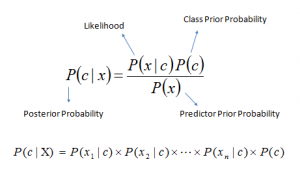




Above,

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).

P(c) is the prior probability of class.

P(x|c) is the likelihood which is the probability of predictor given class.

P(x) is the prior probability of predictor.


It is easy and fast to predict class of test data set. It also perform well in multi class prediction.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
def naive_bayes_model_bagofwords():
    X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)


    vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
    array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


    classifier_liblinear = MultinomialNB()
    classifier_liblinear.fit(array_WF_gen_train, y_train)
    prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

    # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test, prediction_liblinear))
    print("accuracy: {0}".format( accuracy_score(y_test, prediction_liblinear)*100))
    score = accuracy_score(y_test, prediction_liblinear)
    
    return score


In [ ]:
naive_bayes_score_bagofwords = naive_bayes_model_bagofwords()

              precision    recall  f1-score   support

           0       0.89      0.80      0.84     53571
           1       0.91      0.95      0.93    111547

    accuracy                           0.90    165118
   macro avg       0.90      0.87      0.88    165118
weighted avg       0.90      0.90      0.90    165118

accuracy: 90.17853898424157


In [ ]:
def naive_bayes_model_tfidf():
    X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)


    vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
    array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


    classifier_liblinear = MultinomialNB()
    classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
    prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

    # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test, prediction_liblinear))
    print("accuracy: {0}".format( accuracy_score(y_test, prediction_liblinear)*100))
    score = accuracy_score(y_test, prediction_liblinear)
    
    return score

In [ ]:
naive_bayes_score_tfidf = naive_bayes_model_tfidf()

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     53571
           1       0.92      0.93      0.92    111547

    accuracy                           0.90    165118
   macro avg       0.88      0.88      0.88    165118
weighted avg       0.90      0.90      0.90    165118

accuracy: 89.53354570670672


## RANDOM FOREST MODEL

In [ ]:
def random_forest_model_bagofwords():
    X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)


    vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
    array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


    classifier_liblinear = RandomForestClassifier()
    classifier_liblinear.fit(array_WF_gen_train, y_train)
    prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

    # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test, prediction_liblinear))
    print("accuracy: {0}".format( accuracy_score(y_test, prediction_liblinear)*100))
    score = accuracy_score(y_test, prediction_liblinear)
    
    return score

In [ ]:
random_forest_score_bagofwords = random_forest_model_bagofwords()

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     53571
           1       0.95      0.94      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.28793953415133


In [ ]:
def random_forest_model_tfidf():
    X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)


    vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
    array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


    classifier_liblinear = RandomForestClassifier()
    classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
    prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

    # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test, prediction_liblinear))
    print("accuracy: {0}".format( accuracy_score(y_test, prediction_liblinear)*100))
    score = accuracy_score(y_test, prediction_liblinear)
    
    return score

In [ ]:
random_forest_score_tfidf = random_forest_model_tfidf()

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     53571
           1       0.95      0.94      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.29944645647356


##XGBOOST CLASSIFIER MODEL

XGBoost stands for Extreme Gradient Boosting. It is a library for developing fast and high performance gradient boosting tree models. Parallel computation behind the scenes is what makes it this fast. It has been very popular in recent years due to its versatiltiy, scalability and efficiency.


Pros:

1.Extremely fast (parallel computation).

2.Highly efficient.

3.Versatile (Can be used for classification, regression or ranking).

Cons:

1.Only work with numeric features.

2.Leads to overfitting if hyperparameters are not tuned properly.

In [ ]:
def xgboost_model_bagofwords():
    X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)


    vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
    array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


    classifier_liblinear = XGBClassifier()
    classifier_liblinear.fit(array_WF_gen_train, y_train)
    prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

  # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test, prediction_liblinear))
    score = accuracy_score(y_test, prediction_liblinear)
    print("accuracy: {0}".format( accuracy_score(y_test, prediction_liblinear)*100))

    return score

In [ ]:
xgboost_score_bafofwords= xgboost_model_bagofwords()

              precision    recall  f1-score   support

           0       0.94      0.35      0.51     53571
           1       0.76      0.99      0.86    111547

    accuracy                           0.78    165118
   macro avg       0.85      0.67      0.69    165118
weighted avg       0.82      0.78      0.75    165118

accuracy: 78.25736745842367


In [ ]:
def xgboost_model_tfidf():
    X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)


    vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
    array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


    classifier_liblinear = XGBClassifier()
    classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
    prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

    # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test, prediction_liblinear))
    print("accuracy: {0}".format( accuracy_score(y_test, prediction_liblinear)*100))
    score = accuracy_score(y_test, prediction_liblinear)
    
    return score

In [ ]:
xgboost_score_tfidf= xgboost_model_tfidf()

              precision    recall  f1-score   support

           0       0.94      0.35      0.51     53571
           1       0.76      0.99      0.86    111547

    accuracy                           0.78    165118
   macro avg       0.85      0.67      0.69    165118
weighted avg       0.82      0.78      0.75    165118

accuracy: 78.25736745842367


## KNN MODEL

KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

When we say a technique is non-parametric , it means that it does not make any assumptions on the underlying data distribution. In other words, the model structure is determined from the data.

It does not use the training data points to do any generalization. In other words, there is no explicit training phase or it is very minimal. This also means that the training phase is pretty fast. Lack of generalization means that KNN keeps all the training data. 

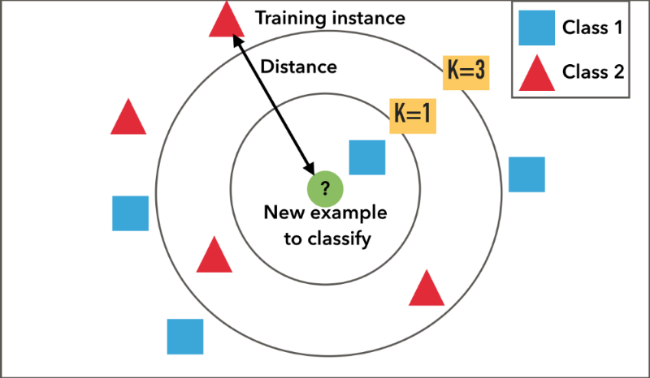

In [ ]:
neighbors=4
def knn_model_bagofwords():
    X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)
                                                      


    vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
    array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


    classifier_liblinear = KNeighborsClassifier(n_neighbors=neighbors)
    classifier_liblinear.fit(array_WF_gen_train, y_train)
    prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

    # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test, prediction_liblinear))
    print("accuracy: {0}".format( accuracy_score(y_test, prediction_liblinear)*100))
    score = accuracy_score(y_test, prediction_liblinear)
    
    return score

In [ ]:
knn_score_bagofwords= knn_model_bagofwords()

              precision    recall  f1-score   support

           0       0.81      0.86      0.84     53571
           1       0.93      0.90      0.92    111547

    accuracy                           0.89    165118
   macro avg       0.87      0.88      0.88    165118
weighted avg       0.89      0.89      0.89    165118

accuracy: 89.0593393815332


In [ ]:
def knn_model_tfidf():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
  array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


  classifier_liblinear = KNeighborsClassifier(n_neighbors= neighbors)
  classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format( score*100))

  return score

In [ ]:
knn_score_tfidf= knn_model_tfidf()

              precision    recall  f1-score   support

           0       0.72      0.90      0.80     53571
           1       0.94      0.83      0.89    111547

    accuracy                           0.85    165118
   macro avg       0.83      0.87      0.84    165118
weighted avg       0.87      0.85      0.86    165118

accuracy: 85.41770128029653


#Model Comaprison
---------------------------------------------------------------
Accuracy Of Model On Bag Of Words Features:
---------------------------------------------------------------
---------------------------------------------------------------

Decision Tree       :--> 91.18933126612482

SVM                 :--> 92.18134909579815

Logsitic Regression :--> 92.22858804006832

Naive Bayes         :--> 90.17853898424157

Random Forest       :--> 84.34392373938637

XGBoost Classifier  :--> 78.25736745842367

KNN Classifier      :--> 89.0593393815332

---------------------------------------------------------------
Accuracy Of Model On TF-IDF Features:
---------------------------------------------------------------
---------------------------------------------------------------
Decision Tree       :--> 91.18993689361548

SVM                 :--> 92.18982788066717

Logsitic Regression :--> 92.22737678508703

Naive Bayes         :--> 89.53354570670672

Random Forest       :--> 92.32851657602443

XGBoost Classifier  :--> 78.25736745842367

KNN Classifier      :--> 85.41770128029653


 

```
from above model comparison we can see that by using TF-IDF Feature we can increase minor  accuaracy of model for Decision tree, SVM and logistic regression and Random Forest Classifier While the accuracy for TF-IDF feature decreases for models Naive bayes, XGBoost classifier and KNN classifier .

Random Forest classifier gives the highest accuracy using TF-IDF feature but quite low accuracy in comparison to other models for bag of words feature.

Implementing these 7 models , We can see that Logistic Regression model perform very well And it give highest accuracy of 92.22%.

After that SVM model perform well on data and give 92.18% accuracy.

And Decision Tree Model give 91.189% accuracy.
```



#PArt -4 :Model Tuning

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
#kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

In [ ]:
array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
array_WF_gen_test = vectorizer_WF_gen.transform(X_test)

In [ ]:
Log_Reg=LogisticRegression(max_iter=2000)

In [ ]:
steps = [('Log_Reg', Log_Reg)]

##Logistic model tuning

LOGISTIC MODEL TUNING FOR BAG OF WORDS FEATURES

In [ ]:
pipeline = Pipeline(steps)

parameters = { 'Log_Reg__C' : [0.1,0.5,1,10,25] , 'Log_Reg__solver' : ['newton-cg','lbfgs','saga']}

CV = GridSearchCV(pipeline, parameters, cv=3, n_jobs= -1, verbose=True)
CV.fit(array_WF_gen_train, y_train)  

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.9min finished


Best score and parameter combination = 
0.9214323348713046
{'Log_Reg__C': 1, 'Log_Reg__solver': 'saga'}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

In [ ]:
array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)

LOGISTIC MODEL TUNING FOR TFIDF FEATURES

In [ ]:
pipeline = Pipeline(steps)

parameters = { 'Log_Reg__C' : [0.1,0.5,1,10,25] , 'Log_Reg__solver' : ['newton-cg','lbfgs','saga']}

CV = GridSearchCV(pipeline, parameters, cv=3, n_jobs= -1, verbose=True)
CV.fit(array_TFIDF_gen_train, y_train)  

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.2min finished


Best score and parameter combination = 
0.9213778282893563
{'Log_Reg__C': 0.1, 'Log_Reg__solver': 'saga'}


##SVM Model tuning


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

In [ ]:
array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)

In [ ]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(array_TFIDF_gen_train[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [ ]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=5, verbose=2, cv=3)
rnd_search_cv.fit(array_TFIDF_gen_train[:15000], y_train[:15000])

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=9.036845059828746, gamma=0.009017021311445588 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=9.036845059828746, gamma=0.009017021311445588, total=   5.1s
[CV] C=9.036845059828746, gamma=0.009017021311445588 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] .. C=9.036845059828746, gamma=0.009017021311445588, total=   5.1s
[CV] C=9.036845059828746, gamma=0.009017021311445588 .................
[CV] .. C=9.036845059828746, gamma=0.009017021311445588, total=   5.0s
[CV] C=10.391115400376757, gamma=0.002083531083635572 ................
[CV] . C=10.391115400376757, gamma=0.002083531083635572, total=   3.3s
[CV] C=10.391115400376757, gamma=0.002083531083635572 ................
[CV] . C=10.391115400376757, gamma=0.002083531083635572, total=   3.3s
[CV] C=10.391115400376757, gamma=0.002083531083635572 ................
[CV] . C=10.391115400376757, gamma=0.002083531083635572, total=   2.9s
[CV] C=6.164186778903904, gamma=0.0015338554367876028 ................
[CV] . C=6.164186778903904, gamma=0.0015338554367876028, total=   3.1s
[CV] C=6.164186778903904, gamma=0.0015338554367876028 ................
[CV] . C=6.164186778903904, gamma=0.0015338554367876028, total=   3.1s
[CV] C=6.164186778903904, gamma=0.0015338554367876028 ................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fcc7d6a90>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fcc7d6780>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=6.164186778903904, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0015338554367876028, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
rnd_search_cv.best_score_

0.8994

##Decision Tree model Tuning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

DECISION TREE MODEL TUNING FOR TFIDF FEATURES

In [ ]:
array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)

In [ ]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier(random_state=0) 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 3) 
  
tree_cv.fit(array_TFIDF_gen_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)*100) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.8959984217082032Best score is 0.89

DECISION TREE MODEL TUNING FOR BAG OF WORDS FEATURES

In [ ]:
vectorizer_WF_gen = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
array_WF_gen_test = vectorizer_WF_gen.transform(X_test)

In [ ]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier(random_state=0) 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 3) 
  
tree_cv.fit(array_WF_gen_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_*100)) 

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 88.53540180879085


In [ ]:
print("Best score is {}".format(tree_cv.best_score_*100)) 

Best score is 88.53540180879085


#Model Implement On US Election Data

In [ ]:
US_elections_2020_copy.head(20)

,text,sentiment,negative_reason,decode,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize,political_party
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"@robreiner so afraid of Nov, Dec, and Jan! Eve...","@robreiner so afraid of Nov, Dec, and Jan! Eve...","so afraid of Nov, Dec, and Jan! Even if #Bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...",so afraid of nov dec and jan even if bidenhar...,so afraid of nov dec and jan even if bidenhar...,"[afraid, nov, dec, jan, bidenharris2020, winfr...","[afraid, nov, dec, jan, bidenharris2020, winfr...",afraid nov dec jan bidenharris2020 winfrump 3 ...,Democratic Party
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,RT @SueC00K: Lord Sumption launches Recovery -...,RT @SueC00K: Lord Sumption launches Recovery -...,RT Lord Sumption launches Recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery a new ini...,rt lord sumption launches recovery a new ini...,"[lord, sumption, launches, recovery, initiativ...","[lord, sumption, launch, recoveri, initi, prom...",lord sumption launch recoveri initi promot ano...,Others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,RT @WalidPhares: Uber Timing: after #Biden adv...,RT @WalidPhares: Uber Timing: after #Biden adv...,RT Uber Timing: after #Biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing after biden advisors said they...,rt uber timing after biden advisors said they...,"[uber, timing, biden, advisors, pressure, braz...","[uber, time, biden, advisor, pressur, brazil, ...",uber time biden advisor pressur brazil sanctio...,Democratic Party
3,b'Every 107 seconds an American is dying from ...,1,NaN,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,"[107, seconds, american, dying, trumpvirus, do...","[107, second, american, die, trumpviru, donald...",107 second american die trumpviru donaldtrump ...,Mixed
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,RT @thewebbix: The #Democrats embrace #Diversi...,RT @thewebbix: The #Democrats embrace #Diversi...,RT The #Democrats embrace #DiversityandInclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the democrats embrace diversityandinclusio...,rt the democrats embrace diversityandinclusio...,"[democrats, embrace, diversityandinclusion, ci...","[democrat, embrac, diversityandinclus, citizen...",democrat embrac diversityandinclus citizen nat...,Democratic Party
5,accelerating. &amp; rising when all #Americans...,0,discrimination,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #americans...,accelerating. &amp; rising when all #americans...,accelerating. & rising when all #americans kil...,accelerating rising when all americans killed...,accelerating rising when all americans killed...,"[accelerating, rising, americans, killed, trum...","[acceler, rise, american, kill, trumpviru]",acceler rise american kill trumpviru,Republic Party
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discr

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)

In [ ]:
y_test0

760     0
287     0
2167    1
959     1
1141    1
       ..
1558    0
2120    1
1073    1
631     1
212     1
Name: sentiment, Length: 766, dtype: int64

Bag Of Words Feature apply on US Election dataset

In [ ]:
## Bag of Words on General Tweets USELEC

vectorizer_WF_USE = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_WF_USE_train = vectorizer_WF_USE.fit_transform(X_train0)
array_WF_USE_test = vectorizer_WF_USE.transform(X_test0)

TF-IDF Feature apply on US Election Dataset

In [ ]:
## TF-IDF on General Tweets USELEC

vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train0)
array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test0)


##SVM Model

SVM MODEL FOR  BAG OF WORDS FEATURESS

In [ ]:
def svm_model_bagofwords0():
    '''Function for SVM on BOW of US Elections'''
    X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'], test_size=0.3,random_state=1)
  
    vectorizer_WF_USE = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
    array_WF_USE_train = vectorizer_WF_USE.fit_transform(X_train0)
    array_WF_USE_test = vectorizer_WF_USE.transform(X_test0)


    classifier_liblinear = svm.LinearSVC(max_iter=2000)
    classifier_liblinear.fit(array_WF_USE_train, y_train0)
    prediction_liblinear = classifier_liblinear.predict(array_WF_USE_test)

    # Now we can use the model to predict classifications for our test features.
    print(classification_report(y_test0, prediction_liblinear))
    print("accuracy: {0}".format( accuracy_score(y_test0, prediction_liblinear)*100))


In [ ]:
svm_model_bagofwords0()

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       387
           1       0.71      0.82      0.76       379

    accuracy                           0.74       766
   macro avg       0.75      0.74      0.74       766
weighted avg       0.75      0.74      0.74       766

accuracy: 74.1514360313316


SVM MODEL FOR TF-IDF FEATURES

In [ ]:
def svm_model_tfidf0():
  X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train0)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test0)


  classifier_liblinear = svm.LinearSVC(max_iter=2000)
  classifier_liblinear.fit(array_TFIDF_USE_train, y_train0)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test0, prediction_liblinear))
  print("accuracy: {0}".format( accuracy_score(y_test0, prediction_liblinear)*100))



In [ ]:
svm_model_tfidf0()

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       387
           1       0.70      0.77      0.73       379

    accuracy                           0.72       766
   macro avg       0.72      0.72      0.72       766
weighted avg       0.72      0.72      0.72       766

accuracy: 72.0626631853786


##Decision Tree Model

DECISION TREE MODEL FOR BAG OF WORDS FEATURE

In [ ]:
def decision_tree_model_bagofwords0():
  X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)

  
  vectorizer_WF_USE = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_USE_train = vectorizer_WF_USE.fit_transform(X_train0)
  array_WF_USE_test = vectorizer_WF_USE.transform(X_test0)


  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_WF_USE_train, y_train0)
  prediction_liblinear = classifier_liblinear.predict(array_WF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test0, prediction_liblinear))
  print("accuracy: {0}".format( accuracy_score(y_test0, prediction_liblinear)*100))

In [ ]:
decision_tree_model_bagofwords0()

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       387
           1       0.66      0.77      0.71       379

    accuracy                           0.69       766
   macro avg       0.70      0.69      0.69       766
weighted avg       0.70      0.69      0.69       766

accuracy: 69.32114882506526


DECISION TREE MODEL FOR TF-IDF FEATURE

In [ ]:
def decision_tree_model_tfidf0():
  X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train0)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test0)

  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_TFIDF_USE_train, y_train0)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test0, prediction_liblinear))
  print("accuracy: {0}".format( accuracy_score(y_test0, prediction_liblinear)*100))


In [ ]:
decision_tree_model_tfidf0()

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       387
           1       0.66      0.77      0.71       379

    accuracy                           0.69       766
   macro avg       0.70      0.69      0.69       766
weighted avg       0.70      0.69      0.69       766

accuracy: 69.32114882506526


## Logistic Regression Model

LOGISTIC REGRESSION MODEL FOR BAG OF WORDS FEATURE

In [ ]:
def log_res_model_bagofwords0():
  X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)

  
  vectorizer_WF_USE = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_USE_train = vectorizer_WF_USE.fit_transform(X_train0)
  array_WF_USE_test = vectorizer_WF_USE.transform(X_test0)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_WF_USE_train, y_train0)
  prediction_liblinear = classifier_liblinear.predict(array_WF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test0, prediction_liblinear))
  print("accuracy: {0}".format( accuracy_score(y_test0, prediction_liblinear)*100))

In [ ]:
log_res_model_bagofwords0()

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       387
           1       0.70      0.81      0.75       379

    accuracy                           0.74       766
   macro avg       0.74      0.74      0.74       766
weighted avg       0.74      0.74      0.74       766

accuracy: 73.62924281984334


LOGISTIC REGRESSION MODEL FOR TF-IDF FEATURE

In [ ]:
def log_res_model_tfidf0():
  X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train0)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test0)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_TFIDF_USE_train, y_train0)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test0, prediction_liblinear))
  print("accuracy: {0}".format( accuracy_score(y_test0, prediction_liblinear)*100))

In [ ]:
log_res_model_tfidf0()

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       387
           1       0.71      0.80      0.75       379

    accuracy                           0.74       766
   macro avg       0.74      0.74      0.74       766
weighted avg       0.74      0.74      0.74       766

accuracy: 73.7597911227154


#Model Tuning On US Election Data Set

##SVM MODEL

SVM MODEL TUNING FOR TF-IDF FEATURES

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform


In [ ]:
vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train0)
array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test0)

In [ ]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(array_TFIDF_USE_train,y_train0 )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(array_TFIDF_USE_train, y_train0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1.702728652013661, gamma=0.0051419670558625835 ................
[CV] . C=1.702728652013661, gamma=0.0051419670558625835, total=   0.2s
[CV] C=1.702728652013661, gamma=0.0051419670558625835 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] . C=1.702728652013661, gamma=0.0051419670558625835, total=   0.2s
[CV] C=1.702728652013661, gamma=0.0051419670558625835 ................
[CV] . C=1.702728652013661, gamma=0.0051419670558625835, total=   0.1s
[CV] C=4.791752379239779, gamma=0.006563864474745447 .................
[CV] .. C=4.791752379239779, gamma=0.006563864474745447, total=   0.2s
[CV] C=4.791752379239779, gamma=0.006563864474745447 .................
[CV] .. C=4.791752379239779, gamma=0.006563864474745447, total=   0.2s
[CV] C=4.791752379239779, gamma=0.006563864474745447 .................
[CV] .. C=4.791752379239779, gamma=0.006563864474745447, total=   0.2s
[CV] C=1.9524120356044408, gamma=0.05499721751714545 .................
[CV] .. C=1.9524120356044408, gamma=0.05499721751714545, total=   0.1s
[CV] C=1.9524120356044408, gamma=0.05499721751714545 .................
[CV] .. C=1.9524120356044408, gamma=0.05499721751714545, total=   0.2s
[CV] C=1.9524120356044408, gamma=0.05499721751714545 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fcf2b63c8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fcf2b64e0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=1.999968636976546, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0011540406684193625, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
rnd_search_cv.best_score_

0.717811554151862

SVM MODEL TUNING FOR BAG OF WORDS FEATURE

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)

  
vectorizer_WF_USE = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_WF_USE_train = vectorizer_WF_USE.fit_transform(X_train0)
array_WF_USE_test = vectorizer_WF_USE.transform(X_test0)

In [ ]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(array_WF_USE_train,y_train0 )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(array_WF_USE_train, y_train0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.382098962662429, gamma=0.016031863108038853 .................
[CV] .. C=8.382098962662429, gamma=0.016031863108038853, total=   0.1s
[CV] C=8.382098962662429, gamma=0.016031863108038853 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .. C=8.382098962662429, gamma=0.016031863108038853, total=   0.1s
[CV] C=8.382098962662429, gamma=0.016031863108038853 .................
[CV] .. C=8.382098962662429, gamma=0.016031863108038853, total=   0.1s
[CV] C=7.357852334656129, gamma=0.0017489897494957754 ................
[CV] . C=7.357852334656129, gamma=0.0017489897494957754, total=   0.1s
[CV] C=7.357852334656129, gamma=0.0017489897494957754 ................
[CV] . C=7.357852334656129, gamma=0.0017489897494957754, total=   0.1s
[CV] C=7.357852334656129, gamma=0.0017489897494957754 ................
[CV] . C=7.357852334656129, gamma=0.0017489897494957754, total=   0.1s
[CV] C=1.4643282796190684, gamma=0.06617712645039997 .................
[CV] .. C=1.4643282796190684, gamma=0.06617712645039997, total=   0.1s
[CV] C=1.4643282796190684, gamma=0.06617712645039997 .................
[CV] .. C=1.4643282796190684, gamma=0.06617712645039997, total=   0.1s
[CV] C=1.4643282796190684, gamma=0.06617712645039997 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fcf2a4be0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5fcf34a390>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=8.840184746146422, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.04131905771798881, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
rnd_search_cv.best_score_

0.7340542928580828

##Logistic Regression Model 

In [ ]:
Log_Reg=LogisticRegression(max_iter=2000)


In [ ]:
steps = [('Log_Reg', Log_Reg)]

LOGISTIC MODEL TUNING FOR TF-IDF FEATURE

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)
vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train0)
array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test0)

In [ ]:
pipeline = Pipeline(steps)

parameters = { 'Log_Reg__C' : [0.1,0.5,1,10,25] , 'Log_Reg__solver' : ['newton-cg','lbfgs','saga']}

CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
CV.fit(array_TFIDF_USE_train, y_train0)  

print('Best score and parameter combination = ')

print(CV.best_score_*100)    
print(CV.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   10.6s


Best score and parameter combination = 
76.0931517167786
{'Log_Reg__C': 0.1, 'Log_Reg__solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.1s finished


LOGISTIC MODEL TUNING FOR BAG OF WORDS FEATURES

In [ ]:
vectorizer_WF_USE = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_WF_USE_train = vectorizer_WF_USE.fit_transform(X_train0)
array_WF_USE_test = vectorizer_WF_USE.transform(X_test0)

In [ ]:
pipeline = Pipeline(steps)

parameters = { 'Log_Reg__C' : [0.1,0.5,1,10,25] , 'Log_Reg__solver' : ['newton-cg','lbfgs','saga']}

CV = GridSearchCV(pipeline, parameters, cv=3, n_jobs= -1, verbose=True)
CV.fit(array_WF_USE_train, y_train0)  

print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best score and parameter combination = 
0.7385295057620364
{'Log_Reg__C': 1, 'Log_Reg__solver': 'saga'}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.5s finished


##Decision Tree MODEL Tuning

DECISION TREE MODEL TUNING FOR TF IDF FEATURES

In [ ]:
vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train0)
array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test0)

In [ ]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier(random_state=0) 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 3) 
  
tree_cv.fit(array_TFIDF_USE_train, y_train0) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_*100)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}
Best score is 64.0543868554133


DECISION TREE MODEL TUNING FOR BAG OF WORDS

In [ ]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(US_elections_2020_copy['detokenize'], US_elections_2020_copy['sentiment'],test_size=0.3,random_state=1)
vectorizer_WF_USE = CountVectorizer(max_features=1000)  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
array_WF_USE_train = vectorizer_WF_USE.fit_transform(X_train0)
array_WF_USE_test = vectorizer_WF_USE.transform(X_test0)

In [ ]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier(random_state=0) 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 3) 
  
tree_cv.fit(array_WF_USE_train, y_train0) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_*100)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3}
Best score is 55.20858007632583


#Model Comparison After Tuning On US ELECTION DATASET

---------------------------------------------------------------
Accuracy Of Model On Bag Of Words Features:
---------------------------------------------------------------
---------------------------------------------------------------

Decision Tree       :--> 64.27838249393717

SVM                 :-->72.90160359445791

Logsitic Regression :--> 73.85295057620364

---------------------------------------------------------------
Accuracy Of Model On TF-IDF Features:
---------------------------------------------------------------
---------------------------------------------------------------
Decision Tree       :-->61.42217961009907

SVM                 :-->73.57283853138571

Logsitic Regression :--> 73.51634613576974

------------------------------------------------------------------------



From Above Comaparison we can easily see that Logistic Regression with Bag of words perform best on U.S Election Dataset.Then SVM model Perform well.

So Here We implement Best model for prediction for the US ELECTION DATASET.

So here we take Logistic Regression Model for prediction.

# Comparison of predictions on negative sentiments

In [ ]:
US_elections_2020_copy.head()

,text,sentiment,negative_reason,decode,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize,political_party
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"@robreiner so afraid of Nov, Dec, and Jan! Eve...","@robreiner so afraid of Nov, Dec, and Jan! Eve...","so afraid of Nov, Dec, and Jan! Even if #Bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...",so afraid of nov dec and jan even if bidenhar...,so afraid of nov dec and jan even if bidenhar...,"[afraid, nov, dec, jan, bidenharris2020, winfr...","[afraid, nov, dec, jan, bidenharris2020, winfr...",afraid nov dec jan bidenharris2020 winfrump 3 ...,Democratic Party
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,RT @SueC00K: Lord Sumption launches Recovery -...,RT @SueC00K: Lord Sumption launches Recovery -...,RT Lord Sumption launches Recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery a new ini...,rt lord sumption launches recovery a new ini...,"[lord, sumption, launches, recovery, initiativ...","[lord, sumption, launch, recoveri, initi, prom...",lord sumption launch recoveri initi promot ano...,Others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,RT @WalidPhares: Uber Timing: after #Biden adv...,RT @WalidPhares: Uber Timing: after #Biden adv...,RT Uber Timing: after #Biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing after biden advisors said they...,rt uber timing after biden advisors said they...,"[uber, timing, biden, advisors, pressure, braz...","[uber, time, biden, advisor, pressur, brazil, ...",uber time biden advisor pressur brazil sanctio...,Democratic Party
3,b'Every 107 seconds an American is dying from ...,1,NaN,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,"[107, seconds, american, dying, trumpvirus, do...","[107, second, american, die, trumpviru, donald...",107 second american die trumpviru donaldtrump ...,Mixed
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,RT @thewebbix: The #Democrats embrace #Diversi...,RT @thewebbix: The #Democrats embrace #Diversi...,RT The #Democrats embrace #DiversityandInclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the democrats embrace diversityandinclusio...,rt the democrats embrace diversityandinclusio...,"[democrats, embrace, diversityandinclusion, ci...","[democrat, embrac, diversityandinclus, citizen...",democrat embrac diversityandinclus citizen nat...,Democratic Party


#Best (Logistic Regression)Model prediction on USE Dataset

Here we first train our dataset on General tweets and then using that model to predict on USE dataset.

In [ ]:
def logred_model_bow_tuned(X_train_ele, y_train_ele, X_test_USE, y_test_USE, model):
  
  X_train, X_test, y_train, y_test = train_test_split(X_train_ele, y_train_ele,test_size=0.3,random_state=1)

  lgmodel = model
  lgmodel.fit(X_train, y_train)

  pred = lgmodel.predict(X_test_USE)

  score = accuracy_score(y_test_USE, pred)

  print("The accuracy of the Log Reg model of Canadian Elections Tweets is: ", score*100)
  print(classification_report(y_test_USE, pred))
  print (confusion_matrix(y_test_USE, pred))


  return pred, score

In [ ]:
array_WF_gen = vectorizer_WF_gen.transform(sentiment_ananlysis_copy['detokenize'])
array_WF_USE = vectorizer_WF_gen.transform(US_elections_2020_copy['detokenize'])
y_gen = sentiment_ananlysis_copy['label']
y_ele = US_elections_2020_copy['sentiment']

In [ ]:
y_gen

0         1
1         1
2         1
3         1
4         1
         ..
550386    0
550387    0
550388    1
550389    1
550390    1
Name: label, Length: 550391, dtype: int64

In [ ]:
pred, accuracy = logred_model_bow_tuned(array_WF_gen, y_gen, array_WF_USE, y_ele,CV)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.4min finished


The accuracy of the Log Reg model of Canadian Elections Tweets is:  65.71316614420063
              precision    recall  f1-score   support

           0       0.61      0.88      0.72      1264
           1       0.78      0.44      0.57      1288

    accuracy                           0.66      2552
   macro avg       0.69      0.66      0.64      2552
weighted avg       0.70      0.66      0.64      2552

[[1106  158]
 [ 717  571]]


## We can see that there is an accuracy of about <b>66%</b> which is a little more than half of the probability. 


In [ ]:
US_elections_2020_copy['predicted'] = pred

US_elections_2020_copy['predicted_sentiment'] = US_elections_2020_copy['predicted'].map({0:'negative', 1:'positive'})

US_elections_2020_copy['sent_comparison'] = '0'

for i in range(len(US_elections_2020_copy['sent_comparison'])):
  if US_elections_2020_copy['sentiment'][i] == US_elections_2020_copy['predicted'][i]:
    US_elections_2020_copy['sent_comparison'][i] = 'truly_predicted'
  else:
    US_elections_2020_copy['sent_comparison'][i] = 'falsely_predicted'

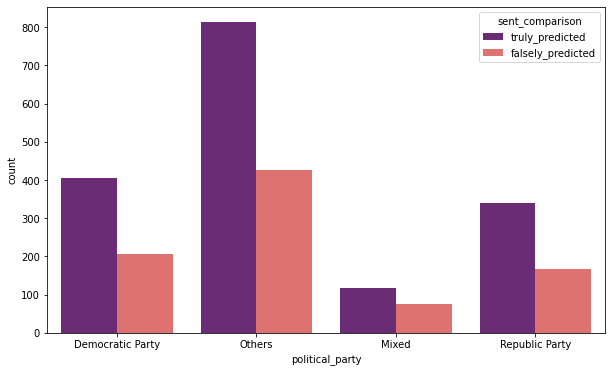

In [ ]:
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(data = US_elections_2020_copy, x = 'political_party', hue = 'sent_comparison', palette='magma')

It is substantiated that most of the sentiment were truly predicted and has a high accuracy when the public expresses its opinion in 'Others' category. We also see that a lot of positive tweets are made on the parties which increases the models accuracy ratio due to words like 'trump' or 'biden'

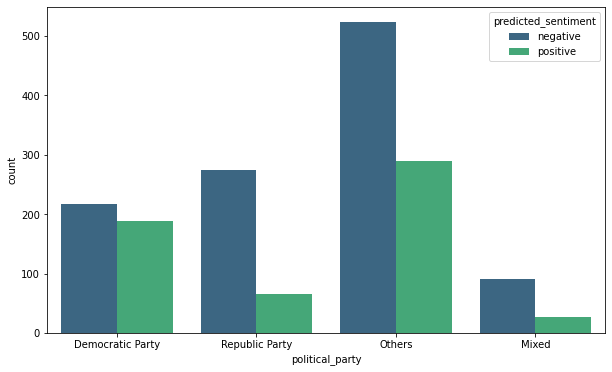

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = US_elections_2020_copy[US_elections_2020_copy['sent_comparison']=='truly_predicted'], x = 'political_party', hue = 'predicted_sentiment', palette = 'viridis')

The amount of negative tweets made are approximately half of the positive tweets for each political party, except (Others). also, the republic party is the solo to have received most number of negative tweets than positive ones

In [ ]:
US_elections_2020_copy.head()

,text,sentiment,negative_reason,decode,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize,political_party,predicted,predicted_sentiment,sent_comparison
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"@robreiner so afraid of Nov, Dec, and Jan! Eve...","@robreiner so afraid of Nov, Dec, and Jan! Eve...","so afraid of Nov, Dec, and Jan! Even if #Bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...",so afraid of nov dec and jan even if bidenhar...,so afraid of nov dec and jan even if bidenhar...,"[afraid, nov, dec, jan, bidenharris2020, winfr...","[afraid, nov, dec, jan, bidenharris2020, winfr...",afraid nov dec jan bidenharris2020 winfrump 3 ...,Democratic Party,0,negative,truly_predicted
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,RT @SueC00K: Lord Sumption launches Recovery -...,RT @SueC00K: Lord Sumption launches Recovery -...,RT Lord Sumption launches Recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery a new ini...,rt lord sumption launches recovery a new ini...,"[lord, sumption, launches, recovery, initiativ...","[lord, sumption, launch, recoveri, initi, prom...",lord sumption launch recoveri initi promot ano...,Others,1,positive,falsely_predicted
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,RT @WalidPhares: Uber Timing: after #Biden adv...,RT @WalidPhares: Uber Timing: after #Biden adv...,RT Uber Timing: after #Biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing after biden advisors said they...,rt uber timing after biden advisors said they...,"[uber, timing, biden, advisors, pressure, braz...","[uber, time, biden, advisor, pressur, brazil, ...",uber time biden advisor pressur brazil sanctio...,Democratic Party,0,negative,truly_predicted
3,b'Every 107 seconds an American is dying from ...,1,NaN,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,"[107, seconds, american, dying, trumpvirus, do...","[107, second, american, die, trumpviru, donald...",107 second american die trumpviru donaldtrump ...,Mixed,0,negative,falsely_predicted
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,RT @thewebbix: The #Democrats embrace #Diversi...,RT @thewebbix: The #Democrats embrace #Diversi...,RT The #Democrats embrace #DiversityandInclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the democrats embrace diversityandinclusio...,rt the democrats embrace diversityandinclusio...,"[democrats, embrace, diversityandinclusion, ci...","[democrat, embrac, diversityandinclus, citizen...",democrat embrac diversityandinclus citizen nat...,Democratic Party,1,positive,truly_predicted


In [ ]:
US_elections_2020_copy[US_elections_2020_copy['sentiment'] == 0]

,text,sentiment,negative_reason,decode,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize,political_party,predicted,predicted_sentiment,sent_comparison
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"@robreiner so afraid of Nov, Dec, and Jan! Eve...","@robreiner so afraid of Nov, Dec, and Jan! Eve...","so afraid of Nov, Dec, and Jan! Even if #Bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...",so afraid of nov dec and jan even if bidenhar...,so afraid of nov dec and jan even if bidenhar...,"[afraid, nov, dec, jan, bidenharris2020, winfr...","[afraid, nov, dec, jan, bidenharris2020, winfr...",afraid nov dec jan bidenharris2020 winfrump 3 ...,Democratic Party,0,negative,truly_predicted
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,RT @SueC00K: Lord Sumption launches Recovery -...,RT @SueC00K: Lord Sumption launches Recovery -...,RT Lord Sumption launches Recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery a new ini...,rt lord sumption launches recovery a new ini...,"[lord, sumption, launches, recovery, initiativ...","[lord, sumption, launch, recoveri, initi, prom...",lord sumption launch recoveri initi promot ano...,Others,1,positive,falsely_predicted
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,RT @WalidPhares: Uber Timing: after #Biden adv...,RT @WalidPhares: Uber Timing: after #Biden adv...,RT Uber Timing: after #Biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing after biden advisors said they...,rt uber timing after biden advisors said they...,"[uber, timing, biden, advisors, pressure, braz...","[uber, time, biden, advisor, pressur, brazil, ...",uber time biden advisor pressur brazil sanctio...,Democratic Party,0,negative,truly_predicted
5,accelerating. &amp; rising when all #Americans...,0,discrimination,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #americans...,accelerating. &amp; rising when all #americans...,accelerating. & rising when all #americans kil...,accelerating rising when all americans killed...,accelerating rising when all americans killed...,"[accelerating, rising, americans, killed, trum...","[acceler, rise, american, kill, trumpviru]",acceler rise american kill trumpviru,Republic Party,0,negative,truly_predicted
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination,@realDonaldTrump 961 dead Americans in one day...,@realDonaldTrump 961 dead Americans in one day...,961 dead Americans in one day! 240 times the ...,961 dead americans in one day! 240 times the ...,961 dead americans in one day! 240 times the ...,961 dead americans in one day! 240 times the ...,961 dead americans in one day 240 times the n...,961 dead americans in one day 240 times the n...,"[961, dead, americans, day, 240, times, number...","[961, dead, american, day, 240, time, number, ...",961 dead american day 240 time number die beng...,Others,0,negative,truly_predicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,b'love is in the air rather watch this than wa...,0,crime,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love

In [ ]:
US_election_negative_df = US_elections_2020_copy[US_elections_2020_copy['sentiment'] == 0]
US_election_negative_df.groupby(['negative_reason'])['negative_reason'].count()

negative_reason
corruption        220
covid19           405
crime             222
discrimination    215
others            202
Name: negative_reason, dtype: int64

In [ ]:
print(US_election_negative_df['detokenize'].count())
print(US_election_negative_df['negative_reason'].count())

1264
1264


#Model Training and Testion on Negative Sentiment

## SVM Model

svm model with bag of words features training and testing 

In [ ]:
def svm_model_bagofwords_nsa():
  
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)
  
  vectorizer_WF_USEneg = CountVectorizer()
  array_WF_USEneg_train = vectorizer_WF_USEneg.fit_transform(X_train_neg)
  array_WF_USEneg_test = vectorizer_WF_USEneg.transform(X_test_neg)
  

  classifier_liblinear = svm.LinearSVC(max_iter=2000)
  classifier_liblinear.fit(array_WF_USEneg_train, y_train_neg)
  prediction_liblinear = classifier_liblinear.predict(array_WF_USEneg_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test_neg, prediction_liblinear))
  score = accuracy_score(y_test_neg, prediction_liblinear)
  print (confusion_matrix(y_test_neg, prediction_liblinear))
  print("The accuracy of the Log Reg model of US Elections Tweets is: ", score*100)

  return score



In [ ]:
svm_model_bagofwords_nsa = svm_model_bagofwords_nsa()

                precision    recall  f1-score   support

    corruption       0.28      0.27      0.28        63
       covid19       0.41      0.48      0.44       120
         crime       0.33      0.27      0.30        73
discrimination       0.37      0.22      0.28        63
        others       0.33      0.43      0.37        61

      accuracy                           0.36       380
     macro avg       0.34      0.34      0.33       380
  weighted avg       0.35      0.36      0.35       380

[[17 24  3  6 13]
 [17 58 19 10 16]
 [11 28 20  5  9]
 [11 17  7 14 14]
 [ 4 16 12  3 26]]
The accuracy of the Log Reg model of US Elections Tweets is:  35.526315789473685


svm model with tfidf features training and testing 

In [ ]:
def svm_model_tfidf_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)

  
  vectorizer_WF_USEneg = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  
  array_WF_USEneg_train = vectorizer_WF_USEneg.fit_transform(X_train_neg)
  array_WF_USEneg_test = vectorizer_WF_USEneg.transform(X_test_neg)
  

  classifier_liblinear = svm.LinearSVC(max_iter=2000)
  classifier_liblinear.fit(array_WF_USEneg_train, y_train_neg)
  prediction_liblinear = classifier_liblinear.predict(array_WF_USEneg_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test_neg, prediction_liblinear))
  score = accuracy_score(y_test_neg, prediction_liblinear)
  print (confusion_matrix(y_test_neg, prediction_liblinear))
  print("The accuracy of the Log Reg model of US Elections Tweets is: ", score*100)

  return score



In [ ]:
svm_tfidf_score_nsa = svm_model_tfidf_nsa()


                precision    recall  f1-score   support

    corruption       0.25      0.25      0.25        63
       covid19       0.40      0.44      0.42       120
         crime       0.33      0.36      0.34        73
discrimination       0.26      0.16      0.20        63
        others       0.35      0.38      0.37        61

      accuracy                           0.34       380
     macro avg       0.32      0.32      0.31       380
  weighted avg       0.33      0.34      0.33       380

[[16 18 10  8 11]
 [17 53 24 13 13]
 [11 20 26  5 11]
 [12 23 11 10  7]
 [ 8 19  9  2 23]]
The accuracy of the Log Reg model of US Elections Tweets is:  33.68421052631579


##Logistic Regression Model

Logistic Regression model training and testion with bag of words features

In [ ]:
def log_res_model_bow_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_USE = CountVectorizer()
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_TFIDF_USE_train, y_train_neg)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test_neg, prediction_liblinear))
  score = accuracy_score(y_test_neg, prediction_liblinear)
  #print("accuracy: {0}".format( *100))
  print (confusion_matrix(y_test_neg, prediction_liblinear))
  print("The accuracy of the Log Reg model of US Elections Tweets is: ", score*100)

  return score

In [ ]:
log_score_bow_nsa = log_res_model_bow_nsa()

                precision    recall  f1-score   support

    corruption       0.31      0.25      0.28        63
       covid19       0.41      0.63      0.50       120
         crime       0.37      0.26      0.30        73
discrimination       0.45      0.22      0.30        63
        others       0.39      0.39      0.39        61

      accuracy                           0.39       380
     macro avg       0.39      0.35      0.35       380
  weighted avg       0.39      0.39      0.37       380

[[16 31  4  2 10]
 [10 76 16  8 10]
 [ 9 34 19  4  7]
 [13 19  6 14 11]
 [ 3 24  7  3 24]]
The accuracy of the Log Reg model of US Elections Tweets is:  39.21052631578947


Logistic Regression model training and testing with tfidf features

In [ ]:
def log_res_model_tfidf_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_TFIDF_USE_train, y_train_neg)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test_neg, prediction_liblinear))
  score = accuracy_score(y_test_neg, prediction_liblinear)
  #print("accuracy: {0}".format( *100))
  print (confusion_matrix(y_test_neg, prediction_liblinear))
  print("The accuracy of the Log Reg model of US Elections Tweets is: ", score*100)

  return score

In [ ]:
log_score_tfidf_nsa = log_res_model_tfidf_nsa()

                precision    recall  f1-score   support

    corruption       0.32      0.30      0.31        63
       covid19       0.39      0.47      0.43       120
         crime       0.34      0.33      0.33        73
discrimination       0.38      0.22      0.28        63
        others       0.36      0.39      0.38        61

      accuracy                           0.36       380
     macro avg       0.36      0.34      0.35       380
  weighted avg       0.36      0.36      0.36       380

[[19 22  4  4 14]
 [15 57 23 12 13]
 [ 9 27 24  6  7]
 [ 9 19 12 14  9]
 [ 8 20  8  1 24]]
The accuracy of the Log Reg model of US Elections Tweets is:  36.31578947368421


## Decision Tree Model

Decision tree model training and testing with bag of words features

In [ ]:
def decision_tree_model_bow_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_USE = CountVectorizer()
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)


  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_TFIDF_USE_train, y_train_neg)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test_neg, prediction_liblinear))
  score = accuracy_score(y_test_neg, prediction_liblinear)
  #print("accuracy: {0}".format( *100))
  print (confusion_matrix(y_test_neg, prediction_liblinear))
  print("The accuracy of the Log Reg model of US Elections Tweets is: ", score*100)

  return score

In [ ]:
dt_score_bow_nsa = decision_tree_model_bow_nsa()

                precision    recall  f1-score   support

    corruption       0.25      0.27      0.26        63
       covid19       0.38      0.55      0.45       120
         crime       0.31      0.22      0.26        73
discrimination       0.30      0.19      0.23        63
        others       0.38      0.30      0.33        61

      accuracy                           0.34       380
     macro avg       0.32      0.30      0.31       380
  weighted avg       0.33      0.34      0.33       380

[[17 28  8  3  7]
 [19 66 14 12  9]
 [13 30 16  7  7]
 [12 27  5 12  7]
 [ 6 22  9  6 18]]
The accuracy of the Log Reg model of US Elections Tweets is:  33.94736842105263


Decision tree model training and testing with tfidf features

In [ ]:
def decision_tree_model_tfidf_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)


  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_TFIDF_USE_train, y_train_neg)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_USE_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test_neg, prediction_liblinear))
  score = accuracy_score(y_test_neg, prediction_liblinear)
  #print("accuracy: {0}".format( *100))
  print (confusion_matrix(y_test_neg, prediction_liblinear))
  print("The accuracy of the Log Reg model of US Elections Tweets is: ", score*100)

  return score

In [ ]:
dt_score_tfidf_nsa = decision_tree_model_tfidf_nsa()

                precision    recall  f1-score   support

    corruption       0.27      0.24      0.25        63
       covid19       0.39      0.55      0.46       120
         crime       0.36      0.26      0.30        73
discrimination       0.24      0.19      0.21        63
        others       0.33      0.30      0.31        61

      accuracy                           0.34       380
     macro avg       0.32      0.31      0.31       380
  weighted avg       0.33      0.34      0.33       380

[[15 20  8  9 11]
 [14 66 14 15 11]
 [11 28 19 10  5]
 [ 7 29  5 12 10]
 [ 8 25  7  3 18]]
The accuracy of the Log Reg model of US Elections Tweets is:  34.21052631578947


#Model Tuning on Negative Sentiment analysis

## SVM Model

SVM model tuning with tfidf features

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [ ]:
def svm_tune_tfidf_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)
  svm_clf = SVC(gamma="scale")
  svm_clf.fit(array_TFIDF_USE_train,y_train_neg)
  param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
  rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
  rnd_search_cv.fit(array_TFIDF_USE_train, y_train_neg)
  
  print("Best Estimation : ",end=" ")
  print(rnd_search_cv.best_estimator_)
  print("BEst Score:",end=" " )
  print(rnd_search_cv.best_score_)
  return rnd_search_cv.best_score_

In [ ]:
svm_tune_score_tfidf_nsa = svm_tune_tfidf_nsa()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=9.754997357978116, gamma=0.00824563003178289 ..................
[CV] ... C=9.754997357978116, gamma=0.00824563003178289, total=   0.1s
[CV] C=9.754997357978116, gamma=0.00824563003178289 ..................
[CV] ... C=9.754997357978116, gamma=0.00824563003178289, total=   0.1s
[CV] C=9.754997357978116, gamma=0.00824563003178289 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... C=9.754997357978116, gamma=0.00824563003178289, total=   0.1s
[CV] C=4.184036409069845, gamma=0.024115682185370815 .................
[CV] .. C=4.184036409069845, gamma=0.024115682185370815, total=   0.1s
[CV] C=4.184036409069845, gamma=0.024115682185370815 .................
[CV] .. C=4.184036409069845, gamma=0.024115682185370815, total=   0.1s
[CV] C=4.184036409069845, gamma=0.024115682185370815 .................
[CV] .. C=4.184036409069845, gamma=0.024115682185370815, total=   0.1s
[CV] C=6.716156920702319, gamma=0.0031562477150710836 ................
[CV] . C=6.716156920702319, gamma=0.0031562477150710836, total=   0.1s
[CV] C=6.716156920702319, gamma=0.0031562477150710836 ................
[CV] . C=6.716156920702319, gamma=0.0031562477150710836, total=   0.1s
[CV] C=6.716156920702319, gamma=0.0031562477150710836 ................
[CV] . C=6.716156920702319, gamma=0.0031562477150710836, total=   0.1s
[CV] C=4.084997737214666, gamma=0.03064771079152526 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s finished


svm Model tune with bag of words features

In [ ]:
def svm_tune_bow_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)
  vectorizer_TFIDF_USE = CountVectorizer()
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)
  svm_clf = SVC(gamma="scale")
  svm_clf.fit(array_TFIDF_USE_train,y_train_neg)
  param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
  rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
  rnd_search_cv.fit(array_TFIDF_USE_train, y_train_neg)
  
  print("Best Estimation : ",end=" ")
  print(rnd_search_cv.best_estimator_)
  print("BEst Score:",end=" " )
  print(rnd_search_cv.best_score_)
  return rnd_search_cv.best_score_

In [ ]:
svm_tune_score_bow_nsa = svm_tune_bow_nsa()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1.6123901777464091, gamma=0.03255804209134672 .................
[CV] .. C=1.6123901777464091, gamma=0.03255804209134672, total=   0.1s
[CV] C=1.6123901777464091, gamma=0.03255804209134672 .................
[CV] .. C=1.6123901777464091, gamma=0.03255804209134672, total=   0.1s
[CV] C=1.6123901777464091, gamma=0.03255804209134672 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .. C=1.6123901777464091, gamma=0.03255804209134672, total=   0.1s
[CV] C=7.114187438696187, gamma=0.00605425646553667 ..................
[CV] ... C=7.114187438696187, gamma=0.00605425646553667, total=   0.1s
[CV] C=7.114187438696187, gamma=0.00605425646553667 ..................
[CV] ... C=7.114187438696187, gamma=0.00605425646553667, total=   0.1s
[CV] C=7.114187438696187, gamma=0.00605425646553667 ..................
[CV] ... C=7.114187438696187, gamma=0.00605425646553667, total=   0.1s
[CV] C=5.949724330405655, gamma=0.02443692464939802 ..................
[CV] ... C=5.949724330405655, gamma=0.02443692464939802, total=   0.1s
[CV] C=5.949724330405655, gamma=0.02443692464939802 ..................
[CV] ... C=5.949724330405655, gamma=0.02443692464939802, total=   0.1s
[CV] C=5.949724330405655, gamma=0.02443692464939802 ..................
[CV] ... C=5.949724330405655, gamma=0.02443692464939802, total=   0.1s
[CV] C=4.689987995623865, gamma=0.01468255398035799 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished


##Logistic Regression Model

Logistic  model tuning with tfidf features

In [ ]:
def log_res_tune_tfidf_nsa():
  Log_Reg=LogisticRegression(max_iter=2000)
  steps = [('Log_Reg', Log_Reg)]
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)
  pipeline = Pipeline(steps)

  parameters = { 'Log_Reg__C' : [0.1,0.5,1,10,25] , 'Log_Reg__solver' : ['newton-cg','lbfgs','saga']}

  CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
  CV.fit(array_TFIDF_USE_train, y_train_neg)  

  print('Best score and parameter combination = ')

  print(CV.best_score_*100)    
  print(CV.best_params_)

In [ ]:
log_res_tune_tfidf_nsa()

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.5s


Best score and parameter combination = 
28.497191011235962
{'Log_Reg__C': 0.1, 'Log_Reg__solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   27.9s finished


Logistiic Regression Model tuning with bag of words features

In [ ]:
def log_res_tune_bow_nsa():
  Log_Reg=LogisticRegression(max_iter=2000)
  steps = [('Log_Reg', Log_Reg)]
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)
  vectorizer_BOW_USE = CountVectorizer()
  array_BOW_USE_train = vectorizer_BOW_USE.fit_transform(X_train_neg)
  array_BOW_USE_test = vectorizer_BOW_USE.transform(X_test_neg)
  pipeline = Pipeline(steps)

  parameters = { 'Log_Reg__C' : [0.1,0.5,1,10,25] , 'Log_Reg__solver' : ['newton-cg','lbfgs','saga']}

  CV = GridSearchCV(pipeline, parameters, cv=10, n_jobs= -1, verbose=True)
  CV.fit(array_BOW_USE_train, y_train_neg)  

  print('Best score and parameter combination = ')

  print(CV.best_score_*100)    
  print(CV.best_params_)

In [ ]:
log_res_tune_bow_nsa()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.4s


Best score and parameter combination = 
34.15474974463738
{'Log_Reg__C': 0.1, 'Log_Reg__solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.8s finished


## Decision Tree Model

Decision tree Model tuning with bag of words features

In [ ]:
def decision_tree_tune_tfidf_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)
  vectorizer_TFIDF_USE = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_USE_train = vectorizer_TFIDF_USE.fit_transform(X_train_neg)
  array_TFIDF_USE_test = vectorizer_TFIDF_USE.transform(X_test_neg)
  # Necessary imports 
  from scipy.stats import randint 
  from sklearn.tree import DecisionTreeClassifier 
  from sklearn.model_selection import RandomizedSearchCV 
    
  # Creating the hyperparameter grid  
  param_dist = {"max_depth": [3, None], 
                "max_features": randint(1, 9), 
                "min_samples_leaf": randint(1, 9), 
                "criterion": ["gini", "entropy"]} 
    
  # Instantiating Decision Tree classifier 
  tree = DecisionTreeClassifier(random_state=0) 
    
  # Instantiating RandomizedSearchCV object 
  tree_cv = RandomizedSearchCV(tree, param_dist, cv = 3) 
    
  tree_cv.fit(array_TFIDF_USE_train, y_train_neg) 
    
  # Print the tuned parameters and score 
  print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
  print("Best score is {}".format(tree_cv.best_score_*100)) 

In [ ]:
decision_tree_tune_tfidf_nsa()

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 8}
Best score is 32.23990161036166


In [ ]:
def decision_tree_tune_bow_nsa():
  X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['negative_reason'],test_size=0.3,random_state=1)
  vectorizer_BOW_USE = CountVectorizer()
  array_BOW_USE_train = vectorizer_BOW_USE.fit_transform(X_train_neg)
  array_BOW_USE_test = vectorizer_BOW_USE.transform(X_test_neg)
  # Necessary imports 
  from scipy.stats import randint 
  from sklearn.tree import DecisionTreeClassifier 
  from sklearn.model_selection import RandomizedSearchCV 
    
  # Creating the hyperparameter grid  
  param_dist = {"max_depth": [3, None], 
                "max_features": randint(1, 9), 
                "min_samples_leaf": randint(1, 9), 
                "criterion": ["gini", "entropy"]} 
    
  # Instantiating Decision Tree classifier 
  tree = DecisionTreeClassifier(random_state=0) 
    
  # Instantiating RandomizedSearchCV object 
  tree_cv = RandomizedSearchCV(tree, param_dist, cv = 3) 
    
  tree_cv.fit(array_BOW_USE_train, y_train_neg) 
    
  # Print the tuned parameters and score 
  print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
  print("Best score is {}".format(tree_cv.best_score_*100)) 

In [ ]:
decision_tree_tune_bow_nsa()

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2}
Best score is 32.579268995733884


## Results

<h2> Most of the accuracy score if fixed at low rate of <b>36%</b>. We can manifest from this, that though the favour of people towards the political party can be majorly predicted, the reason for their dissapointment in the negative sentiment is rarely deciphered. </h2>

One of the prime reasons being the lesser number of data for negative tweets, and mixed feelings of the citizens towards the politicians.

In [ ]:
# Attempting to group the reasons into 3 classes

US_election_negative_df = US_election_negative_df.reset_index()
US_election_negative_df['combined_reason'] = '0'

for i in range(len(US_election_negative_df['negative_reason'])):
  if (US_election_negative_df['negative_reason'][i]=='covid19'):
    US_election_negative_df['combined_reason'][i] = 'Health Facility'
  elif (US_election_negative_df['negative_reason'][i]=='corruption') | (US_election_negative_df['negative_reason'][i]=='crime') :
    US_election_negative_df['combined_reason'][i] = 'Crime'
  elif (US_election_negative_df['negative_reason'][i]=='discrimination') | (US_election_negative_df['negative_reason'][i]=='others'):
    US_election_negative_df['combined_reason'][i] = 'Racism and Others'

US_election_negative_df

,index,text,sentiment,negative_reason,decode,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize,political_party,predicted,predicted_sentiment,sent_comparison,combined_reason
0,0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"@robreiner so afraid of Nov, Dec, and Jan! Eve...","@robreiner so afraid of Nov, Dec, and Jan! Eve...","so afraid of Nov, Dec, and Jan! Even if #Bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...",so afraid of nov dec and jan even if bidenhar...,so afraid of nov dec and jan even if bidenhar...,"[afraid, nov, dec, jan, bidenharris2020, winfr...","[afraid, nov, dec, jan, bidenharris2020, winfr...",afraid nov dec jan bidenharris2020 winfrump 3 ...,Democratic Party,0,negative,truly_predicted,Health Facility
1,1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,RT @SueC00K: Lord Sumption launches Recovery -...,RT @SueC00K: Lord Sumption launches Recovery -...,RT Lord Sumption launches Recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery a new ini...,rt lord sumption launches recovery a new ini...,"[lord, sumption, launches, recovery, initiativ...","[lord, sumption, launch, recoveri, initi, prom...",lord sumption launch recoveri initi promot ano...,Others,1,positive,falsely_predicted,Racism and Others
2,2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,RT @WalidPhares: Uber Timing: after #Biden adv...,RT @WalidPhares: Uber Timing: after #Biden adv...,RT Uber Timing: after #Biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing after biden advisors said they...,rt uber timing after biden advisors said they...,"[uber, timing, biden, advisors, pressure, braz...","[uber, time, biden, advisor, pressur, brazil, ...",uber time biden advisor pressur brazil sanctio...,Democratic Party,0,negative,truly_predicted,Health Facility
3,5,accelerating. &amp; rising when all #Americans...,0,discrimination,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #Americans...,accelerating. &amp; rising when all #americans...,accelerating. &amp; rising when all #americans...,accelerating. & rising when all #americans kil...,accelerating rising when all americans killed...,accelerating rising when all americans killed...,"[accelerating, rising, americans, killed, trum...","[acceler, rise, american, kill, trumpviru]",acceler rise american kill trumpviru,Republic Party,0,negative,truly_predicted,Racism and Others
4,6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination,@realDonaldTrump 961 dead Americans in one day...,@realDonaldTrump 961 dead Americans in one day...,961 dead Americans in one day! 240 times the ...,961 dead americans in one day! 240 times the ...,961 dead americans in one day! 240 times the ...,961 dead americans in one day! 240 times the ...,961 dead americans in one day 240 times the n...,961 dead americans in one day 240 times the n...,"[961, dead, americans, day, 240, times, number...","[961, dead, american, day, 240, time, number, ...",961 dead american day 240 time number die beng...,Others,0,negative,truly_predicted,Racism and Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,2542,b'love is in the air rather watch this than wa...,0,crime,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rather watch this than watc...,love is in the air rath

In [ ]:
vectorizer_WF_USEneg = CountVectorizer()

X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(US_election_negative_df['detokenize'], US_election_negative_df['combined_reason'],test_size=0.3,random_state=1)

array_WF_USEneg_train = vectorizer_WF_USEneg.fit_transform(X_train_neg)
array_WF_USEneg_test = vectorizer_WF_USEneg.transform(X_test_neg)

CV.fit(array_WF_USEneg_train, y_train_neg)
predict = CV.predict(array_WF_USEneg_test)

score = accuracy_score(y_test_neg,predict)

print("The accuracy of the Log Reg model of Canadian Elections Tweets is: ", score*100)
print(classification_report(y_test_neg, predict))
print (confusion_matrix(y_test_neg, predict))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


The accuracy of the Log Reg model of Canadian Elections Tweets is:  45.0
                   precision    recall  f1-score   support

            Crime       0.44      0.43      0.44       136
  Health Facility       0.45      0.44      0.45       120
Racism and Others       0.46      0.48      0.47       124

         accuracy                           0.45       380
        macro avg       0.45      0.45      0.45       380
     weighted avg       0.45      0.45      0.45       380

[[59 36 41]
 [39 53 28]
 [36 29 59]]


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.0s finished


In [ ]:
# LOGISTIC REGRESSION

classifier_liblinear = LogisticRegression(random_state=1,max_iter=500000,verbose=0)
classifier_liblinear.fit(array_WF_USEneg_train, y_train_neg)
prediction_liblinear = classifier_liblinear.predict(array_WF_USEneg_test)

score = accuracy_score(y_test_neg,prediction_liblinear)

print("The accuracy of the Log Reg model of US Elections Tweets with negative sentiment is: ", score*100)
print(classification_report(y_test_neg, prediction_liblinear))
print (confusion_matrix(y_test_neg, prediction_liblinear))


The accuracy of the Log Reg model of US Elections Tweets with negative sentiment is:  47.63157894736842
                   precision    recall  f1-score   support

            Crime       0.46      0.49      0.47       136
  Health Facility       0.48      0.44      0.46       120
Racism and Others       0.50      0.49      0.49       124

         accuracy                           0.48       380
        macro avg       0.48      0.48      0.48       380
     weighted avg       0.48      0.48      0.48       380

[[67 33 36]
 [41 53 26]
 [39 24 61]]


Best Accuracy is find 48%.

#Part-5 Results

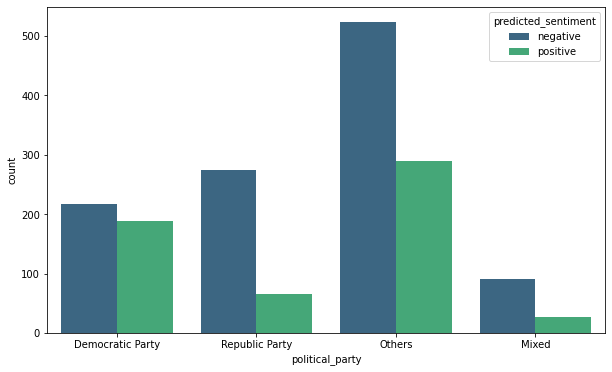

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = US_elections_2020_copy[US_elections_2020_copy['sent_comparison']=='truly_predicted'], x = 'political_party', hue = 'predicted_sentiment', palette = 'viridis')

The amount of negative tweets made are approximately half of the positive tweets for each political party, except (Others). also, the republic party is the solo to have received most number of negative tweets than positive ones

In [ ]:
US_elections_2020_copy

,text,sentiment,negative_reason,decode,without_url,remove_twitter_handles,lowercase,remove_html_attributes,html_to_ascii,no_punctuations,non_ascii,tokenized_tweet,stemming,detokenize,political_party,predicted,predicted_sentiment,sent_comparison
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"@robreiner so afraid of Nov, Dec, and Jan! Eve...","@robreiner so afraid of Nov, Dec, and Jan! Eve...","so afraid of Nov, Dec, and Jan! Even if #Bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...","so afraid of nov, dec, and jan! even if #bide...",so afraid of nov dec and jan even if bidenhar...,so afraid of nov dec and jan even if bidenhar...,"[afraid, nov, dec, jan, bidenharris2020, winfr...","[afraid, nov, dec, jan, bidenharris2020, winfr...",afraid nov dec jan bidenharris2020 winfrump 3 ...,Democratic Party,0,negative,truly_predicted
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,RT @SueC00K: Lord Sumption launches Recovery -...,RT @SueC00K: Lord Sumption launches Recovery -...,RT Lord Sumption launches Recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery - a new in...,rt lord sumption launches recovery a new ini...,rt lord sumption launches recovery a new ini...,"[lord, sumption, launches, recovery, initiativ...","[lord, sumption, launch, recoveri, initi, prom...",lord sumption launch recoveri initi promot ano...,Others,1,positive,falsely_predicted
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,RT @WalidPhares: Uber Timing: after #Biden adv...,RT @WalidPhares: Uber Timing: after #Biden adv...,RT Uber Timing: after #Biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing: after #biden advisors said th...,rt uber timing after biden advisors said they...,rt uber timing after biden advisors said they...,"[uber, timing, biden, advisors, pressure, braz...","[uber, time, biden, advisor, pressur, brazil, ...",uber time biden advisor pressur brazil sanctio...,Democratic Party,0,negative,truly_predicted
3,b'Every 107 seconds an American is dying from ...,1,NaN,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,Every 107 seconds an American is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,every 107 seconds an american is dying from th...,"[107, seconds, american, dying, trumpvirus, do...","[107, second, american, die, trumpviru, donald...",107 second american die trumpviru donaldtrump ...,Mixed,0,negative,falsely_predicted
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,RT @thewebbix: The #Democrats embrace #Diversi...,RT @thewebbix: The #Democrats embrace #Diversi...,RT The #Democrats embrace #DiversityandInclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the #democrats embrace #diversityandinclus...,rt the democrats embrace diversityandinclusio...,rt the democrats embrace diversityandinclusio...,"[democrats, embrace, diversityandinclusion, ci...","[democrat, embrac, diversityandinclus, citizen...",democrat embrac diversityandinclus citizen nat...,Democratic Party,1,positive,truly_predicted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,"b'RT @BoycottUtah: It is Friday, October 30, 2...",1,NaN,"RT @BoycottUtah: It is Friday, October 30, 202...","RT @BoycottUtah: It is Friday, October 30, 202...","RT It is Friday, October 30, 2020. One citize...","rt it is friday, october 30, 2020. one citize...","rt it is friday, october 30, 2020. one citize...","rt it is friday, october 30, 2020. one citize...",rt it is friday october 30 2020 one citizen

## Q1 - Research Question: “What can public opinion on Twitter tell us about the US political landscape in 2020?” 

We can say that, from the above analysis, <b> The Republic Party</b> had overall negative response. While, the <b> Democratic Party</b> and other mixed liberals had very positive response. Also, The prominent election candidates were The Democratic and Republic Politicians, who has the frontiers like Trump and Biden respectively. Speaking from the view of the test results, the citizens were more prominently supporting The Democratic Party, as a result of which it had the mojority of votes in densely populated states.

Others and Mixed political parties were not much leading in terms of projection and support. Hence even after a positive responses, they couldn't gather much support/votes.

## Q2 - Describe the results of the analysis and discuss your interpretation of the results.

1) In all the 4 datasets, (sentiment analysis, tuned models, US elections, Negative tweets) the best Model was <b>Logistic Regression </b> which had accuracy as high as 92% in sentiment analysis, and 93% after tuning.

2)In US election tweets, the categorical data about the sentiment of each tweet was correctly predicted to <b>73%</b>.

3) During the training of <b>Negative tweets</b>, it was found that the amount of tweets were less to be able to fulfill a good model.

4) However, even while focussing on negative reasons, the model can accurately predict the sentiment and public opinion about any political party, but it was difficult to interpret <b>the cause of negativity</b>.

5) The major reason of all the above conclusion is: <b>Uneven distribution of each category and overlapping negative reasons in dataset.</b>

6) The hierarchy of efficient models from high to low is: <b>Logistic Regression, SVM model, Decision Tree.</b>

## Q3 - Explain how each party is viewed in the public eye based on the sentiment value.

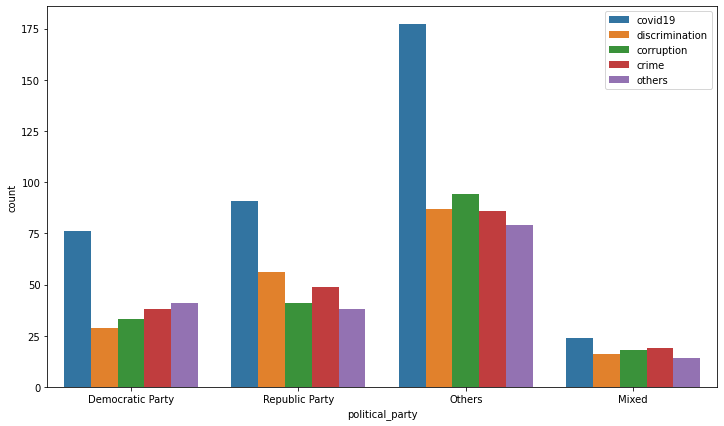

In [ ]:
## Looking at the distribution of negative tweets in correct predictions

plt.figure(figsize=(12,7))
ax = sns.countplot(x="political_party", data=US_elections_2020_copy[(US_elections_2020_copy['sent_comparison']=='truly_predicted') & (US_elections_2020_copy['sentiment']==0)], hue='negative_reason')
plt.legend(loc='upper right')

As discussed earlier, The Republic Party had more number of negative sentiment tweets. The apparent reason is reflected here, We can see that most of the people comented about the regulations in terms of healthcare issues (during covid-19 outbreak) and other vital reasons like corruption and crime are peak reasons of the negativity.

Apart from this, the Crime rate during the rule or discussion of Democratic party and Others are high. Indicating that even though there was a state of lockdown, these crime rates were not lower in their administration.

The citizens focus on the leader who are ahead in the spotlight in each party, hence while talking about the reasons, they use words like biden, trump, potus, harris etc of th eprominent leaders to manifest their opinion.

## Q4 - For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.



In [ ]:
US_election_negative_df.groupby(['negative_reason'])['negative_reason'].count()

negative_reason
corruption        220
covid19           405
crime             222
discrimination    215
others            202
Name: negative_reason, dtype: int64

Here from above we can see that 4 classes have 200 samples and other one is 400 samples so Here samples are imbalanced.So we try to make same samples and merge and create new classes.

Ans: Firstly, the dataset for negative tweets are very few compared to positive tweets. also, by the information gathered from the recall score, the major negative reason for any political party is 63% covid19 (healthCare). The reason being most of the concern surrounded about the pandemic and its regulations to curb. So, the dataset tweet for other vital reasons are also less, which fails the model to predict them from any given sample.

This is the main reason that samples are imbalanced for prediction.
That's why  we get 48% accuuracy.

Data is so small that we can't predict exact prediction by training model on data.

## Q5- For both models, suggest one way you can improve the accuracy of your models.

 <h3> 1) Negative Sentiment tweets are as low as 1000. Hence we may need a larger and diverse (non-overlapping) dataset. <br> 
 2) For a good model, like SVM, the categories and dataset of both positive-negative tweets and 'reasons of negative tweet' shold be in balanced ratio. As we can see, we have 400 tweet_set for covid19, whereas other reasons are only 200(nearly half).<br>
 3) If we collect a larger dataset, we may as well need a better hardware and processor for training and testing the models quickly.<br>
 4) SVM is a costly model, which takes long durations to train on large datasets like NLP. Also, tuning this model on hyperparameters may take effectively longer time, and require a heavy-duty processor.<br>
 5)Increasing the number of max_features in CountVectorizer/TF-IDF Vectorizer to get more features to build model
 6) Further speaking while passing manual parameters in model tuning, we can increase the number of parameters K-Fold of Cross validation, solver and penalty and c for Logistic Regression,  etc for better tuning and higher accuracy.<br>
 7) We can only tune upto 15,000 instances of data at a time in SVM model.</h3>

#Bonus Part

## Trying Word2Vec and N-grams feature

1.Word-Embedding (Word to Vector)

Word2vec is a technique for natural language processing. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence.

Word Embeddings or word Vectors are numerical representations of contextual similarities between words, they can be manipulated and made to perform amazing tasks like- finding degree of similarity between two words, finding odd one out in a list of words, performing word concatenation/addition, and most importantly, Calculating probability of a text under a model

In our case, we use word2vec for creating n-dimensional vectors of each word in the corpus, for later training purposes in analyzing positive and negative sentiments.

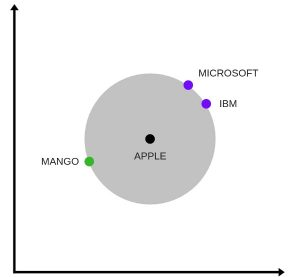

In [ ]:
from gensim.models import word2vec

In [ ]:
def word_embed(corpus, size):
    '''Function that returns word embedding, if passed list of sentences and size of vector'''
    
    #tokenization and model preparation
    tokenize_sent = [sent.split() for sent in corpus]
    m_w2v = word2vec.Word2Vec(tokenize_sent, size=size, min_count=1)
    
    #creating vord2vec for every word in every sentence in corpus
    
    array_wordEmbed = []
    for sent in corpus:
        vec = np.zeros(size).reshape((1, size))
        count = 0.
        if sent == '':
            a = vec
        else:
            sent = sent.split(' ')
            for word in sent:
                vec += m_w2v[word].reshape((1,size))
                count +=1
        if count !=0:
            vec /= count
        a = vec
        array_wordEmbed.append(a)
    return np.concatenate(tuple(array_wordEmbed))

In [ ]:
corpus = [sent for sent in sentiment_ananlysis_copy['detokenize']]
array_w2v_gen = word_embed(corpus, 200)
array_w2v_gen.shape

(550391, 200)

## Testing Logistic Regression, SVM and Decision Tree models on Word Vectorizers

In [ ]:
y_gen #target variable for general sentiment analysis tweets

0         1
1         1
2         1
3         1
4         1
         ..
550386    0
550387    0
550388    1
550389    1
550390    1
Name: label, Length: 550391, dtype: int64

In [ ]:
def logreg_w2v_gen():
    X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(array_w2v_gen,y_gen,test_size=0.3,random_state=1)
    
    classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
    classifier_liblinear.fit(X_train_w2v, y_train_w2v)
    prediction_liblinear = classifier_liblinear.predict(X_test_w2v)
    
    print(classification_report(y_test_w2v,prediction_liblinear))
    score = accuracy_score(y_test_w2v, prediction_liblinear)
    print(f"The accuracy of Logistic Regression Model in Word2Vec is: {score}")

    return score

In [ ]:
logreg_w2v_gen_score = logreg_w2v_gen()

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     53571
           1       0.94      0.95      0.95    111547

    accuracy                           0.93    165118
   macro avg       0.92      0.92      0.92    165118
weighted avg       0.93      0.93      0.93    165118

The accuracy of Logistic Regression Model in Word2Vec is: 0.930891847042721


In [ ]:
def svm_w2v_gen():
    X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(array_w2v_gen,y_gen,test_size=0.3,random_state=1)
    
    classifier_liblinear = svm.LinearSVC(max_iter=2000)
    classifier_liblinear.fit(X_train_w2v[:10000], y_train_w2v[:10000])
    prediction_liblinear = classifier_liblinear.predict(X_test_w2v)
    
    print(classification_report(y_test_w2v,prediction_liblinear))
    score = accuracy_score(y_test_w2v, prediction_liblinear)
    print(f"The accuracy of SVM Model in Word2Vec is: {score}")

    return score

In [ ]:
svm_w2v_gen_score = svm_w2v_gen()

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     53571
           1       0.94      0.95      0.95    111547

    accuracy                           0.93    165118
   macro avg       0.92      0.91      0.92    165118
weighted avg       0.93      0.93      0.93    165118

The accuracy of SVM Model in Word2Vec is: 0.926531329110091


In [ ]:
def dtree_w2v_gen():
    X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(array_w2v_gen,y_gen,test_size=0.3,random_state=1)
    
    classifier_liblinear = DecisionTreeClassifier(random_state=0)
    classifier_liblinear.fit(X_train_w2v[:20000], y_train_w2v[:20000])
    prediction_liblinear = classifier_liblinear.predict(X_test_w2v)
    
    print(classification_report(y_test_w2v,prediction_liblinear))
    score = accuracy_score(y_test_w2v, prediction_liblinear)
    print(f"The accuracy of Decision Tree Model in Word2Vec is: {score}")

    return score

In [ ]:
dtree_w2v_gen_score = dtree_w2v_gen()

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     53571
           1       0.89      0.90      0.90    111547

    accuracy                           0.86    165118
   macro avg       0.84      0.84      0.84    165118
weighted avg       0.86      0.86      0.86    165118

The accuracy of Decision Tree Model in Word2Vec is: 0.861741300161097


As we can see, There is comparitively no improvement in accuracy score. However, calculation time in word2vec is large. Hence, we need a better processor speed to train and test large dataset as such with 55k instances. Also, we observe that in this case, with reduced instances of 20k from the dataset, the accuracy of Decision tree model reduced to 86% from 91%

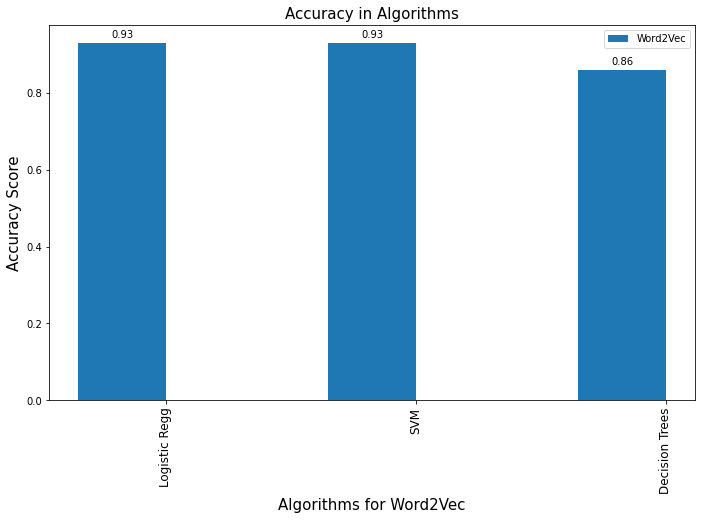

In [ ]:
labels = ['Logistic Regg','SVM', 'Decision Trees']
y_bow = [round(logreg_w2v_gen_score, 2), round(svm_w2v_gen_score, 2) , round(dtree_w2v_gen_score, 2)]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, y_bow, width, label='Word2Vec')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()
plt.xlabel('Algorithms for Word2Vec', fontsize = 15)
plt.xticks(rotation = 90,  fontsize = 12)
plt.show()

##N-gram Feeature 

**2. N-grams Feature in BOW and Tf-Idf**


N-grams are contiguous sequences of n-items in a sentence. N can be 1, 2 or any other positive integers, although usually we do not consider very large N because those n-grams rarely appears in many different places.

The general idea is that you can look at each pair (or triple, set of four, etc.) of words that occur next to each other. In a sufficently-large corpus, you're likely to see "the red" and "red apple" several times, but less likely to see "apple red" and "red the". This is useful to know if, for example, you're trying to figure out what someone is more likely to say to help decide between possible output.

These co-occuring words are known as "n-grams", where "n" is a number saying how long a string of words you considered. (Unigrams are single words, bigrams are two words, trigrams are three words, 4-grams are four words, 5-grams are five words, etc.) And here we are using Trigrams

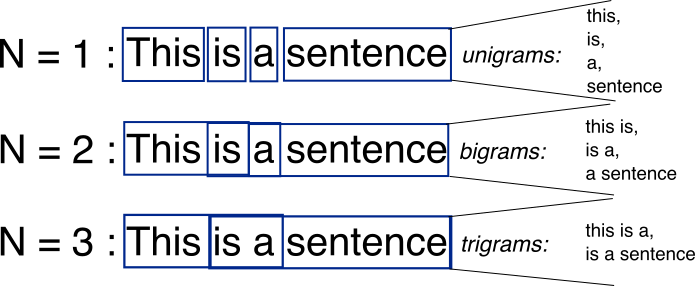

N-grams Feauture in Tf-IDF

In [ ]:
def log_res_model_tfidf_ngrams():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000,ngram_range=(1,3)) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
  array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format( score*100))

  return score

In [ ]:
log_score_tfidf_ngram = log_res_model_tfidf_ngrams()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.09837812958006


In [ ]:
def svm_model_tfidf_ngram():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000,ngram_range=(1,3)) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
  array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


  classifier_liblinear = svm.LinearSVC(max_iter=2000)
  classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score= accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format(score *100))

  return score



In [ ]:
svm_score_tfidf_ngram = svm_model_tfidf_ngram()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.02206906575904


In [ ]:
def decision_tree_model_tfidf_ngram():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_TFIDF_gen = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=1000,ngram_range=(1,3)) # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_TFIDF_gen_train = vectorizer_TFIDF_gen.fit_transform(X_train)
  array_TFIDF_gen_test = vectorizer_TFIDF_gen.transform(X_test)


  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_TFIDF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_TFIDF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score =  accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format(score*100))

  return score

In [ ]:
dec_score_tfidf_ngram = decision_tree_model_tfidf_ngram()

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     53571
           1       0.94      0.92      0.93    111547

    accuracy                           0.91    165118
   macro avg       0.89      0.90      0.90    165118
weighted avg       0.91      0.91      0.91    165118

accuracy: 91.04034690342664


N-gram feature in BagOfWords

In [ ]:
def decision_tree_model_bagofwords_ngram():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_WF_gen = CountVectorizer(max_features=1000,ngram_range=(1,3))  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
  array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


  classifier_liblinear = DecisionTreeClassifier(random_state=0)
  classifier_liblinear.fit(array_WF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format( score*100))

  return score

In [ ]:
dec_score_bagofwords_ngram = decision_tree_model_bagofwords_ngram()

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     53571
           1       0.94      0.92      0.93    111547

    accuracy                           0.91    165118
   macro avg       0.89      0.90      0.90    165118
weighted avg       0.91      0.91      0.91    165118

accuracy: 91.039741275936


In [ ]:
def log_res_model_bagofwords_ngram():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  vectorizer_WF_gen = CountVectorizer(max_features=1000,ngram_range=(1,3))  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
  array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


  classifier_liblinear = LogisticRegression(random_state=1,max_iter=2000,verbose=0)
  classifier_liblinear.fit(array_WF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format( score*100))

  return score

In [ ]:
log_score_bagofwords_ngram = log_res_model_bagofwords_ngram()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.10019501205198


In [ ]:
def svm_model_bagofwords_ngram():
  X_train, X_test, y_train, y_test = train_test_split(sentiment_ananlysis_copy['detokenize'], sentiment_ananlysis_copy['label'],test_size=0.3,random_state=1)

  
  vectorizer_WF_gen = CountVectorizer(max_features=1000,ngram_range=(1,3))  # Choosing max no of features as 1000 to save computational time (can remove the argument to get better accuracy)
  array_WF_gen_train = vectorizer_WF_gen.fit_transform(X_train)
  array_WF_gen_test = vectorizer_WF_gen.transform(X_test)


  classifier_liblinear = svm.LinearSVC(max_iter=2000)
  classifier_liblinear.fit(array_WF_gen_train, y_train)
  prediction_liblinear = classifier_liblinear.predict(array_WF_gen_test)

  # Now we can use the model to predict classifications for our test features.
  print(classification_report(y_test, prediction_liblinear))
  score = accuracy_score(y_test, prediction_liblinear)
  print("accuracy: {0}".format(score*100))

  return score



In [ ]:
svm_score_bagofwords_ngram = svm_model_bagofwords_ngram()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     53571
           1       0.95      0.93      0.94    111547

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy: 92.02812534066547


##Model Comaprison


**Accuracy Of Model On Bag Of Words Features:**

Decision Tree :--> 91.039741275936

SVM :--> 92.02812534066547

Logsitic Regression :--> 92.10019501205198




**Accuracy Of Model On TF-IDF Features:**

Decision Tree :--> 91.04034690342664

SVM :--> 92.03720975302511

Logsitic Regression :--> 92.09837812958006




Data Exploration using Pie chart

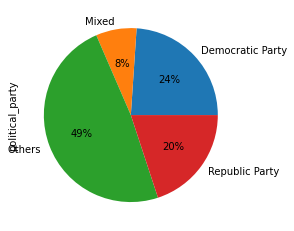

In [ ]:
US_elections_2020_copy.groupby('political_party')['political_party'].count().plot(kind='pie', autopct='%1.0f%%')

Model Performance on Sentiment_analysis.csv

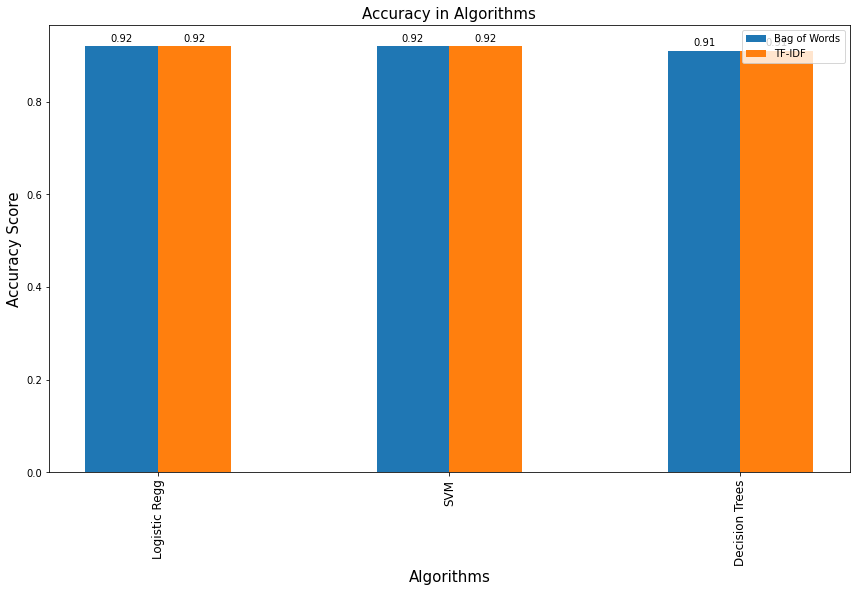

In [ ]:
labels = ['Logistic Regg', 'SVM', 'Decision Trees']
y_bow = [round(log_score_bagofwords,2), round(svm_score_bagofwords,2), round(dec_score_bagofwords,2)]
y_tfidf = [round(log_score_tfidf,2), round(svm_score_tfidf,2), round(dec_score_tfidf,2)]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, y_bow, width, label='Bag of Words')
rects2 = ax.bar(x + width/2, y_tfidf, width, label='TF-IDF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score', fontsize = 15)
ax.set_title('Accuracy in Algorithms', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xlabel('Algorithms', fontsize = 15)
plt.xticks(rotation = 90,  fontsize = 12)
plt.show()

In case of N-grams, we implemented Tri-grams model, which yielded a small proportion on decrease. The concept here is to split the words into a group of three. In this case, the vectorizer may take similar groups of unlabelled words. When such data with no information is passed, the model tends to give minute false predictions. The accuracy is still high as before, near about:

~91% - 92%